<h1>Market Basket Analysis: Cardiovascular Disease and Lifestyle</h1>


---
Rafi Adyatma
<br>
Dataset can be found here: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [ ]:
# Pandas and Graph utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import required modules for Association rule
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2>Data Loading</h2>

In [ ]:
# Read data from file and show 5 first rows
data = pd.read_csv("CVD_cleaned.csv", index_col=False)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

Check data description, go get the whole view of data.

In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
# Get numerical and categorical columns
numerical = data.select_dtypes(include=['float64']).columns
categorical = data.select_dtypes(include=['object']).columns
print("Numerical :", numerical)
print("Categorical: ", categorical)

Numerical : Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')
Categorical:  Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check unique values for each categorical column
print("Categorical columns and total unique values:")
for col in categorical:
  print(f"{col} - {data[col].nunique()}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Categorical columns and total unique values:
General_Health - 5
Checkup - 5
Exercise - 2
Heart_Disease - 2
Skin_Cancer - 2
Other_Cancer - 2
Depression - 2
Diabetes - 4
Arthritis - 2
Sex - 2
Age_Category - 13
Smoking_History - 2


We will use information above to label every columns with its corresponding data type.

We want to see the connection between health conditions and also the effect of lifestyle of a person. We will be using these columns:

Heatlh Conditions ♥
  
1.   **Heart_Disease** | Categorical - 2 Values
2.   **Skin_Cancer** | Categorical - 2 Values
3.   **Other_Cancer** | Categorical - 2 Values
4.   **Depression** | Categorical - 2 Values
5.   **Diabetes** | Categorical - 4 Values
6.   **Arthritis** | Categorical - 2 Values

Liftstyle 🏋

1.   **Exercise** | Categorical - 2 Values
2.   **Smoking_History** | Categorical - 2 Values
3.   **Alcohol_Consumption** | Numeric
4.   **FriedPotato_Consumption** | Numeric
5.   **Green_Vegetables_Consumption** | Numeric
6.   **Fruit_Consumption** | Numeric

Other Factors 🧍

1. **Age_Category** | Categorical - 13 Values
2. **BMI** (combination of height and weight) | Numeric

And General_Health being an additional indicator that can be used for further prediction.

For each of the columns, we will do different adjustments to fit the apriori algorithm.

In [ ]:
# Split categorical and numerical columns
categorical_columns = [
    'Heart_Disease',
    'Skin_Cancer',
    'Other_Cancer',
    'Depression',
    'Diabetes',
    'Arthritis',
    'Exercise',
    'Smoking_History',
    ]

numeric_columns = [
    "Alcohol_Consumption",
    "FriedPotato_Consumption",
    "Green_Vegetables_Consumption",
    "Fruit_Consumption",
    "BMI"
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Do some cleaning:

*   Remove rows with (any) missing values
*   Noise data should be fixed



In [ ]:
# Checking missing values on each columns
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

No missing values detected

<h2>Univariate Analysis</h2>

Next step, we should see how the data is presented in each columns

In [ ]:
# Draw barchart function
def drawBar(count_values, title, vertical=False):
  if (vertical):
    plt.barh(count_values.index, count_values)
  else:
    plt.bar(count_values.index, count_values)
  plt.title(title)
  plt.show()

def BinaryPercentage(count_values):
  yes = count_values["Yes"]
  no = count_values["No"]
  total = yes+no
  percentage = yes/total
  print("Percentage: {:.2f}%".format(percentage * 100))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# General_Health
general_health = data['General_Health'].value_counts()
general_health

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


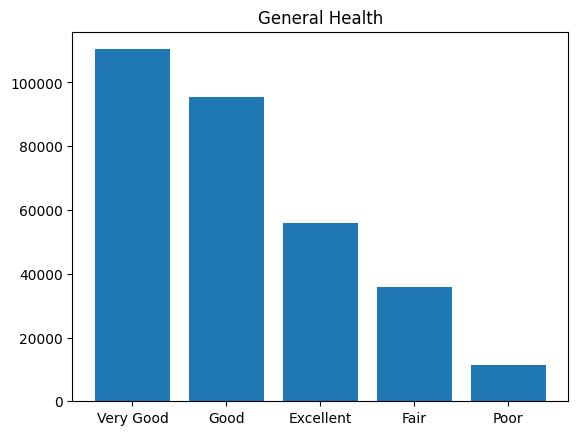

In [ ]:
drawBar(general_health, "General Health")

This is good, we have no noisy data (all data are well-categorized).
<br>
But since this column is a categorical, then we should do one-hot encodings:

*  Health_VeryGood
*  Health_Good
*  Health_Excellent
*  Health_Fair
*  Health_Poor

In [ ]:
# Heart_Disease
heart_disease = data['Heart_Disease'].value_counts()
BinaryPercentage(heart_disease)
heart_disease

Percentage: 8.09%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


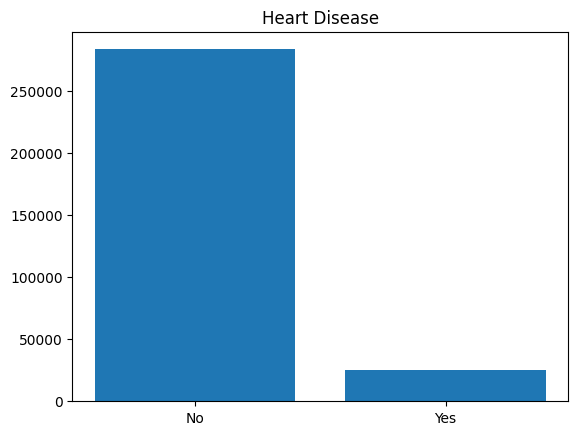

In [ ]:
# Barchart of Heart_Disease
drawBar(heart_disease, "Heart Disease")

Heart Disease is binary data and imbalanced.
<br>
Only "Yes" or "No" values.

In [ ]:
# Skin_Cancer
skin_cancer = data['Skin_Cancer'].value_counts()
BinaryPercentage(skin_cancer)
skin_cancer

Percentage: 9.71%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


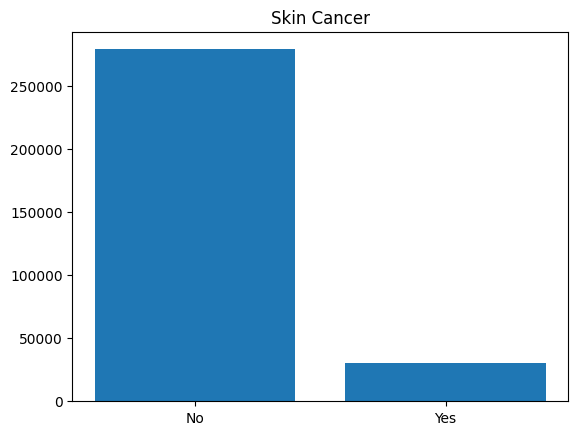

In [ ]:
drawBar(skin_cancer, "Skin Cancer")

Skin_Cancer: Binary data
<br>
No noisy data but imbalanced.

In [ ]:
# Other_Cancer
other_cancer = data['Other_Cancer'].value_counts()
BinaryPercentage(other_cancer)
other_cancer

Percentage: 9.67%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     278976
Yes     29878
Name: Other_Cancer, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


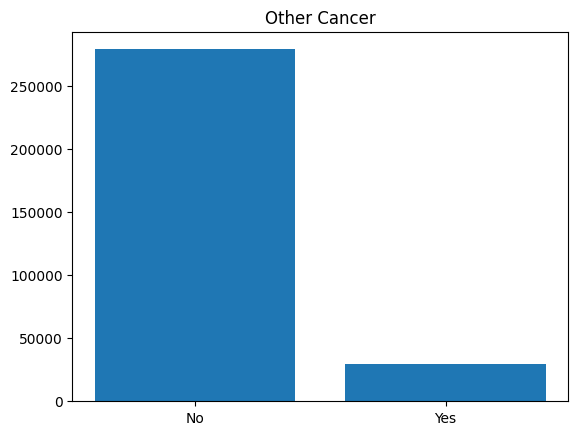

In [ ]:
# Other_Cancer barchart
drawBar(other_cancer, "Other Cancer")

Other_Cancer: Binary data
<br>
No noisy data but imbalanced occurs.

In [ ]:
# Depression
depression = data['Depression'].value_counts()
BinaryPercentage(depression)
depression

Percentage: 20.04%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     246953
Yes     61901
Name: Depression, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


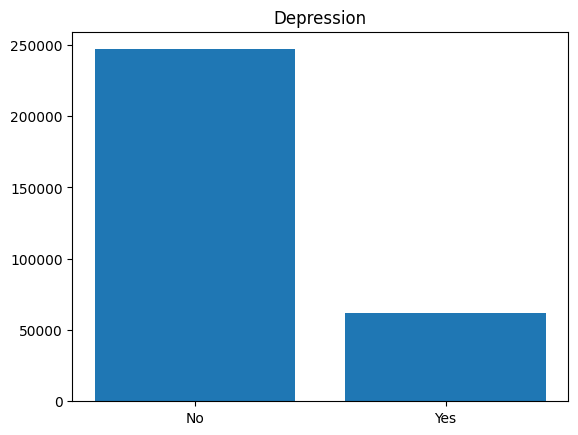

In [ ]:
drawBar(depression, "Depression")

Depression: Binary data
<br>
No noisy data and a bit imbalanced.

In [ ]:
# Diabetes
diabetes = data['Diabetes'].value_counts()
diabetes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


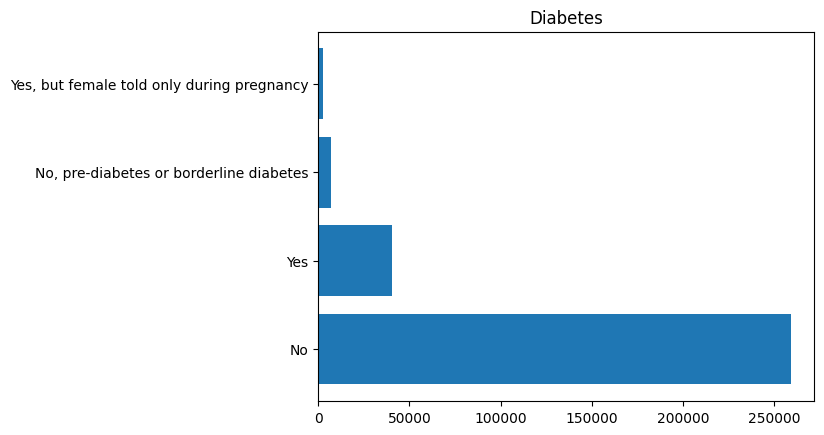

In [ ]:
drawBar(diabetes, "Diabetes", True)

This one is a bit different, we have "Yes" and "No" options and we will not do anything to them.
<br><br>
The problem lies in the other two options, what should we do then?
<br>
My idea is to transform the other two:<br>
* pre-diabetes or borderline ➡ AlmostDiabetes<br>
* Pregnancy Diabetes ➡ PregnancyDiabetes

In [ ]:
# Arthritis
arthritis = data['Arthritis'].value_counts()
BinaryPercentage(arthritis)
arthritis

Percentage: 32.72%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     207783
Yes    101071
Name: Arthritis, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


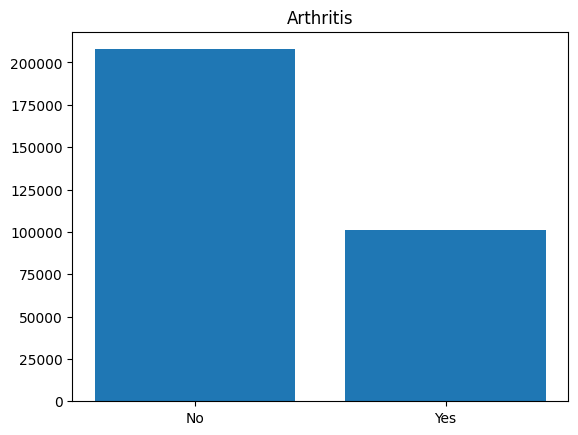

In [ ]:
# Draw graph
drawBar(arthritis, "Arthritis")

Arthritis: Binary data.


In [ ]:
# Exercise
exercise = data['Exercise'].value_counts()
BinaryPercentage(exercise)
exercise

Percentage: 77.51%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Yes    239381
No      69473
Name: Exercise, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


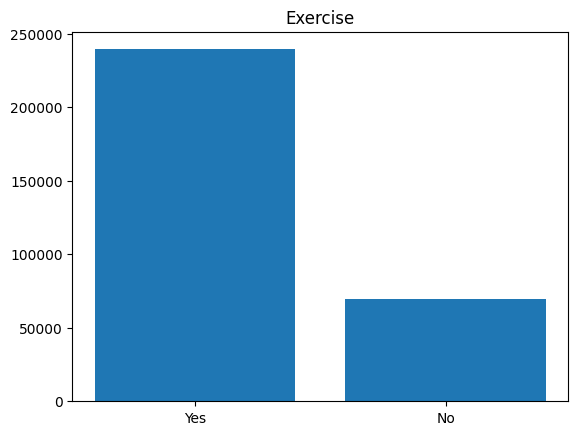

In [ ]:
# Exercise graph
drawBar(exercise, "Exercise")

Exercise: Binary data
<br>
Other data have low Support but this being high Support, it is not good to include this column to our association rule as everyone just buy/choose this item.

In [ ]:
# Smoking_History
smoking_history = data['Smoking_History'].value_counts()
BinaryPercentage(smoking_history)
smoking_history

Percentage: 40.56%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No     183590
Yes    125264
Name: Smoking_History, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


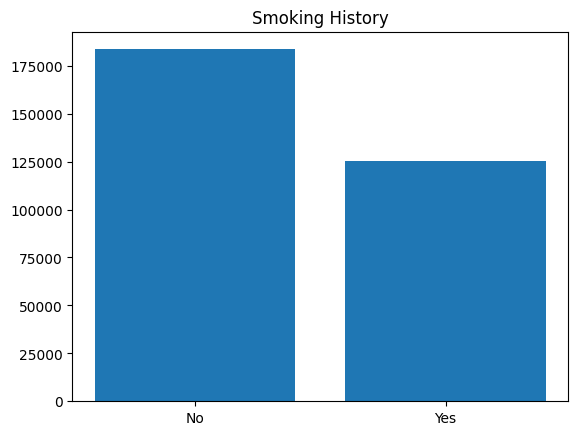

In [ ]:
drawBar(smoking_history, "Smoking History")

Smoking History: Binary data.
<br>
No noise data found but a bit imbalanced.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Alcohol_Consumption', ylabel='Count'>

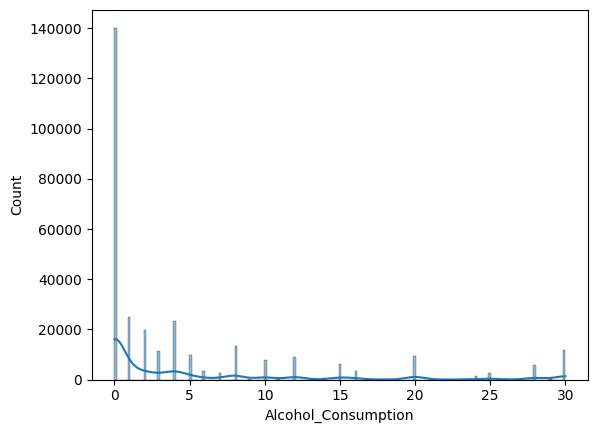

In [ ]:
# Alcohol_Consumption is numeric, we should use histogram
sns.histplot(data=data, x="Alcohol_Consumption", kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='FriedPotato_Consumption', ylabel='Count'>

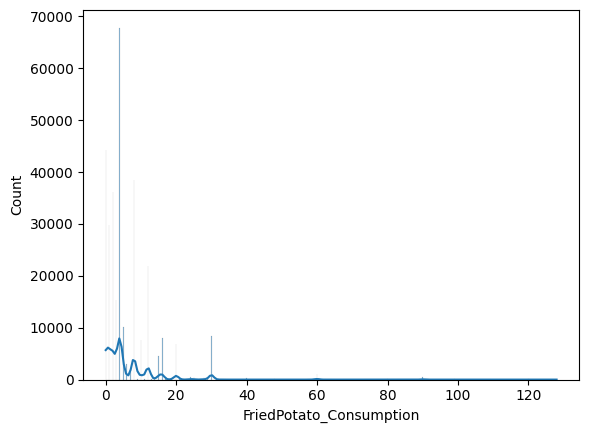

In [ ]:
# FriedPotato_Consumption with histogram
sns.histplot(data=data, x="FriedPotato_Consumption", kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Green_Vegetables_Consumption', ylabel='Count'>

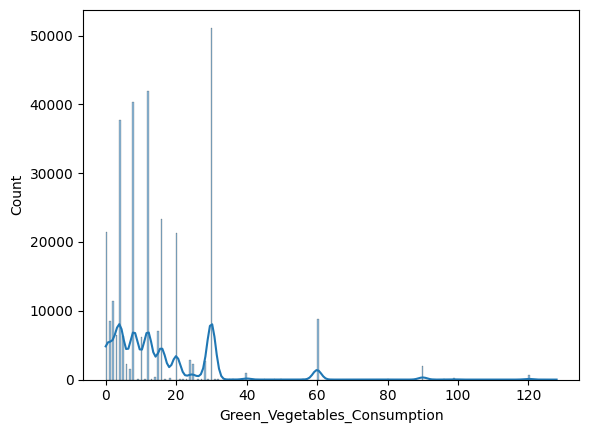

In [ ]:
# Green_Vegetables_Consumption
sns.histplot(data=data, x="Green_Vegetables_Consumption", kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Fruit_Consumption', ylabel='Count'>

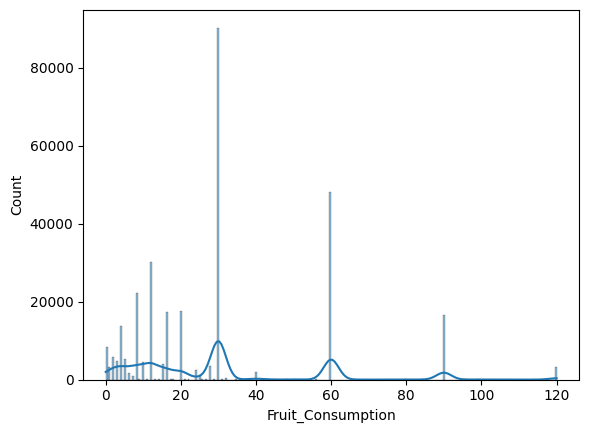

In [ ]:
# Fruit_Consumption with histogram
sns.histplot(data=data, x="Fruit_Consumption", kde=True)

<h2>Bivariate Analysis</h2>

<h3>Categorical Bivariate Analysis</h3>

In [ ]:
# Declare Bivariate analysis functions

def bivariate_categorical(dataframe, left, right):
  # Aggregate data
  aggregated = data.groupby([left, right])[left].count().unstack()

  # Plot
  plt.figure(figsize=(10,7))
  plt.title("{:1} vs {:2}".format(left, right))

  color = "rocket"
  palette = sns.color_palette(color)

  fig = sns.countplot(data=dataframe, x=left, hue=right, hue_order=aggregated.columns, order=aggregated.index, palette=color)
  fig.set_ylabel("Count")

  # Annotate utils
  bar_position = 0
  patches = fig.patches
  offset = data[left].value_counts().max() * 0.01

  for i in range(dataframe[right].nunique()):
    for j in range(dataframe[left].nunique()):
      aggregated_cols = aggregated.values[j]
      col_total_sum = aggregated_cols.sum()
      curr_value = aggregated_cols[i]

      percentage = curr_value/col_total_sum

      x = patches[bar_position].get_x() + patches[j].get_width()/2
      y = patches[bar_position].get_height() + offset
      bar_position += 1

      fig.annotate('{:d}({:.1f}%)'.format(curr_value, percentage*100), (x, y), ha='center')

  plt.show()


def bivariate_numerical_categorical(dataframe, numeric, categorical):
  fig, ax = plt.subplots(1, 2, figsize=(12, 7))
  fig.suptitle("{:1} vs {:2}".format(numeric, categorical))
  color = "rocket"
  palette = sns.color_palette(color)

  # Left side graph: Histogram
  sns.histplot(data=dataframe, x=dataframe[numeric], hue=categorical, bins=50, kde=True, palette=color, ax=ax[0])
  ax[0].set(xlabel=None)
  ax[0].grid(False)

  # Right side graph: Boxplot
  sns.boxplot(data=dataframe, x=data[numeric], y=categorical, ax=ax[1], palette=color)
  ax[1].set(xlabel=None)
  ax[1].grid(False)

  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


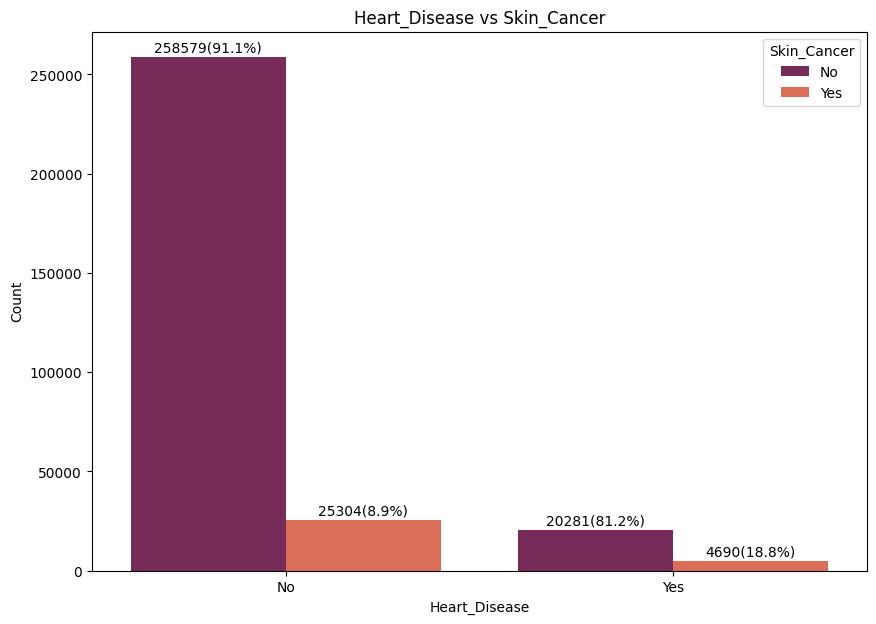

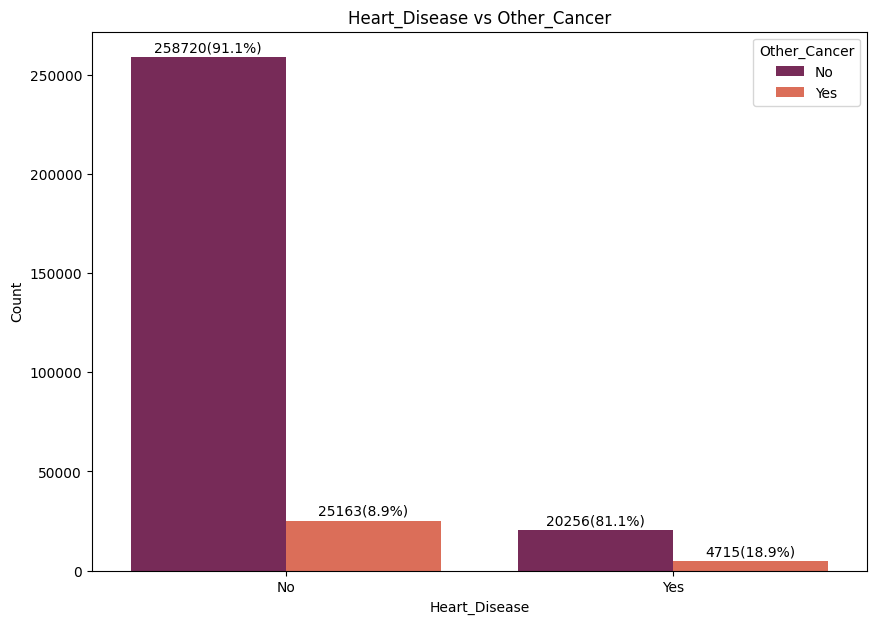

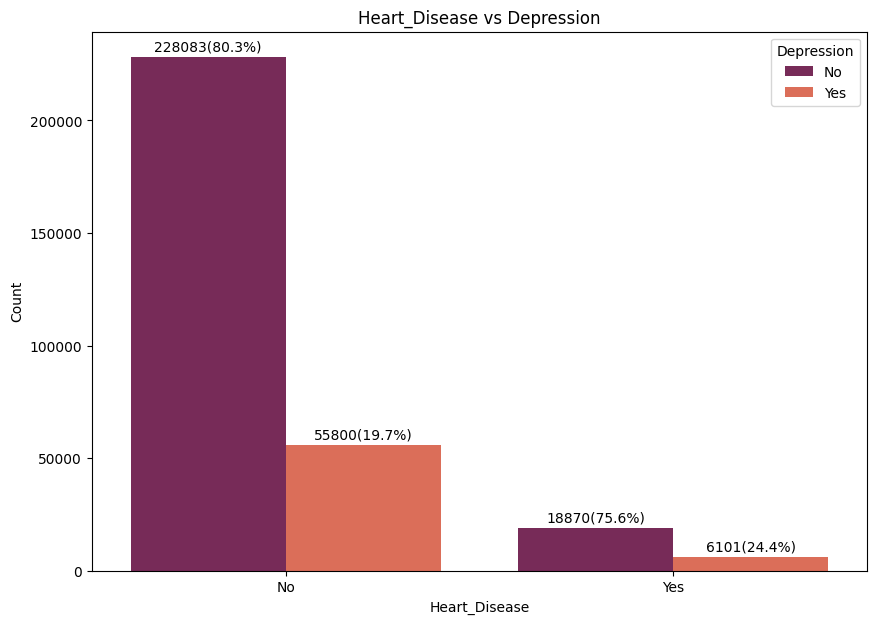

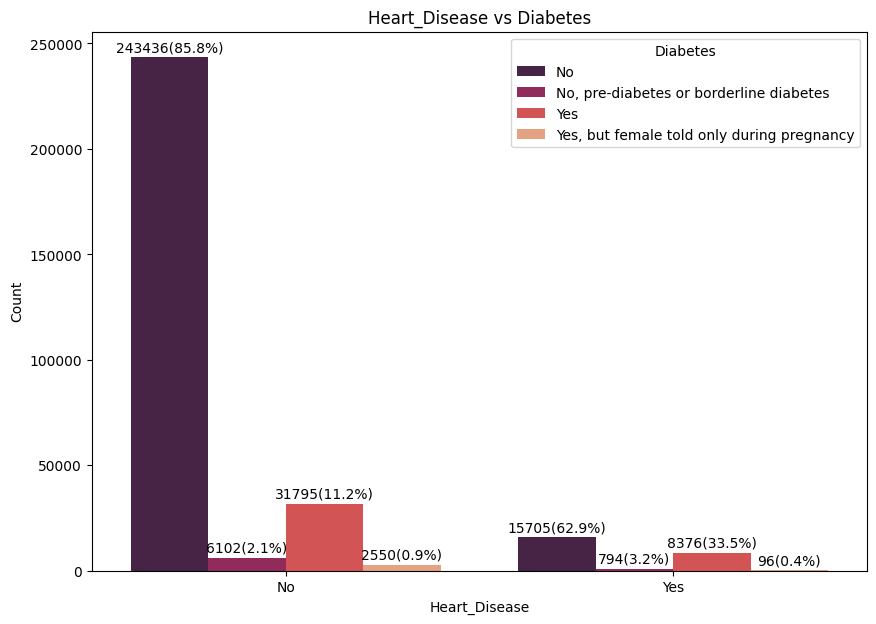

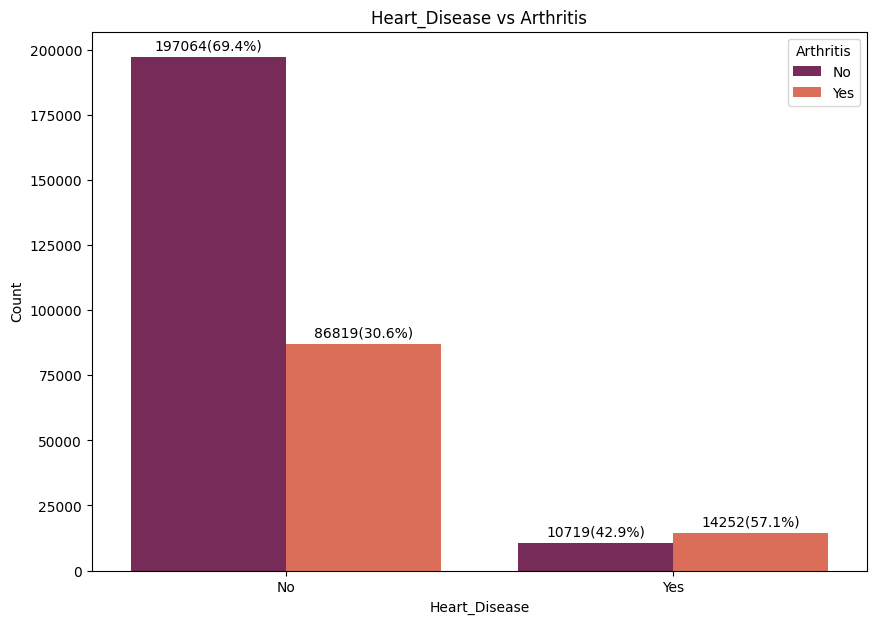

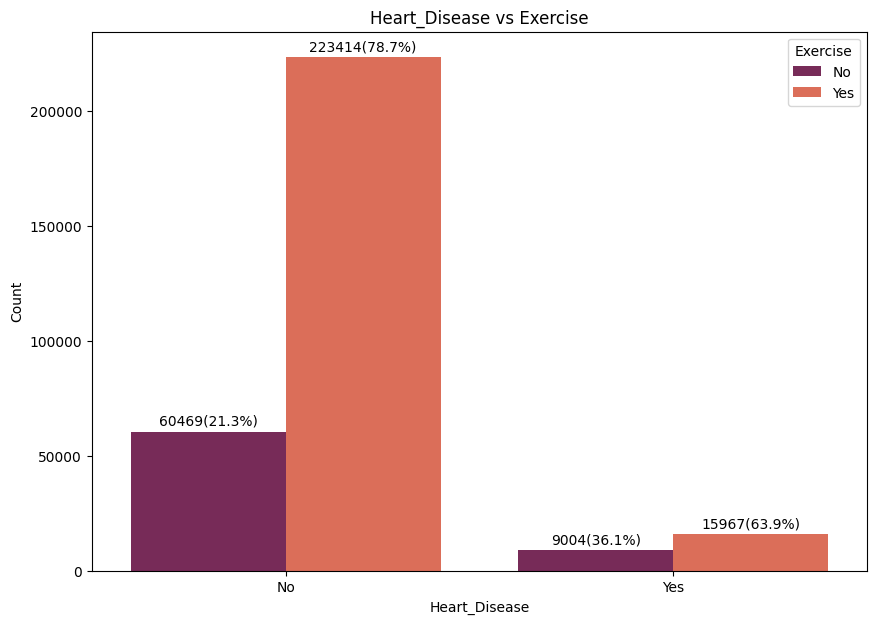

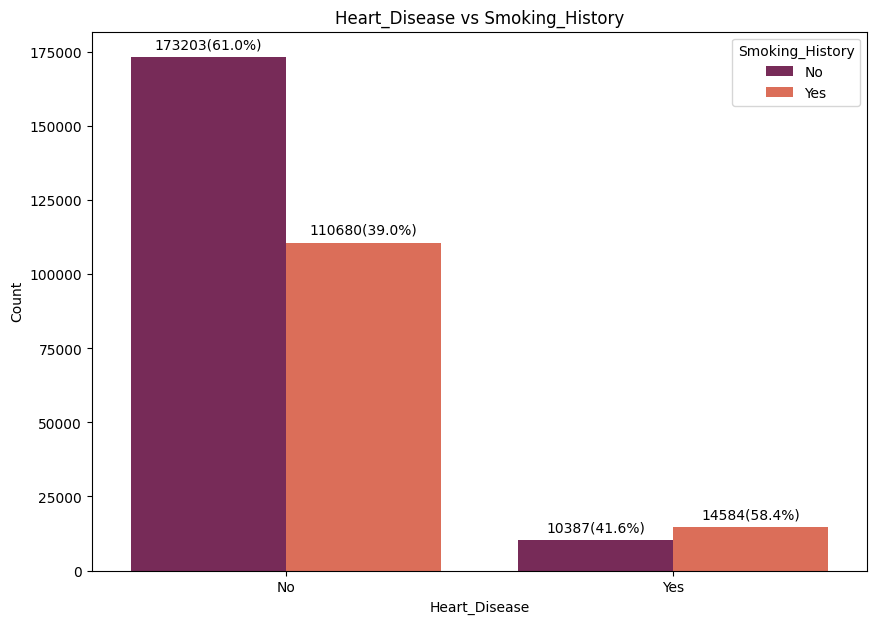

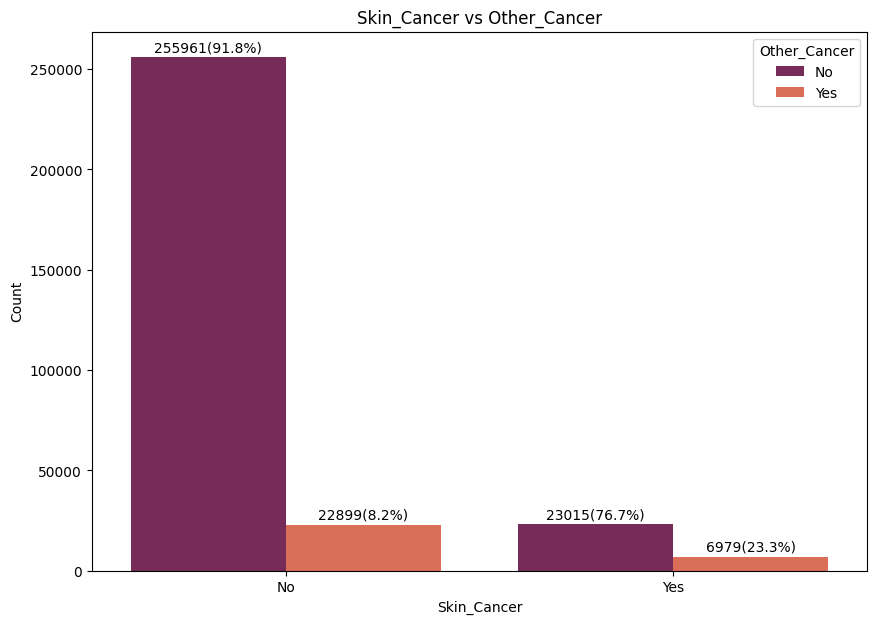

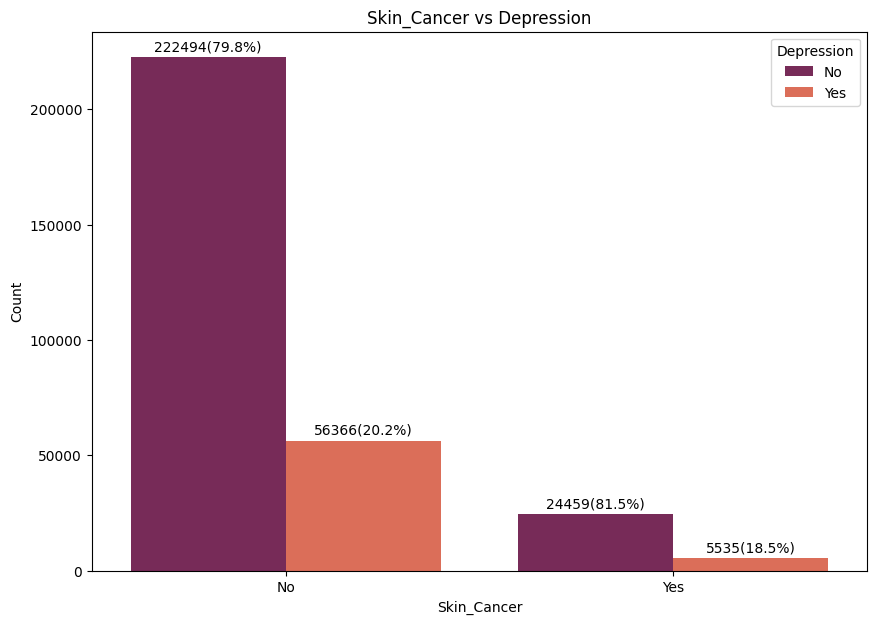

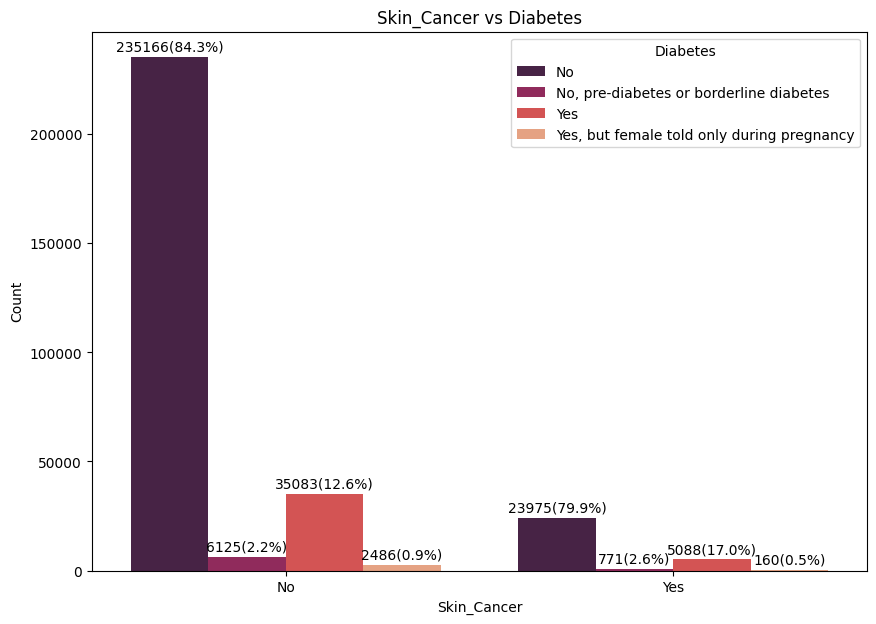

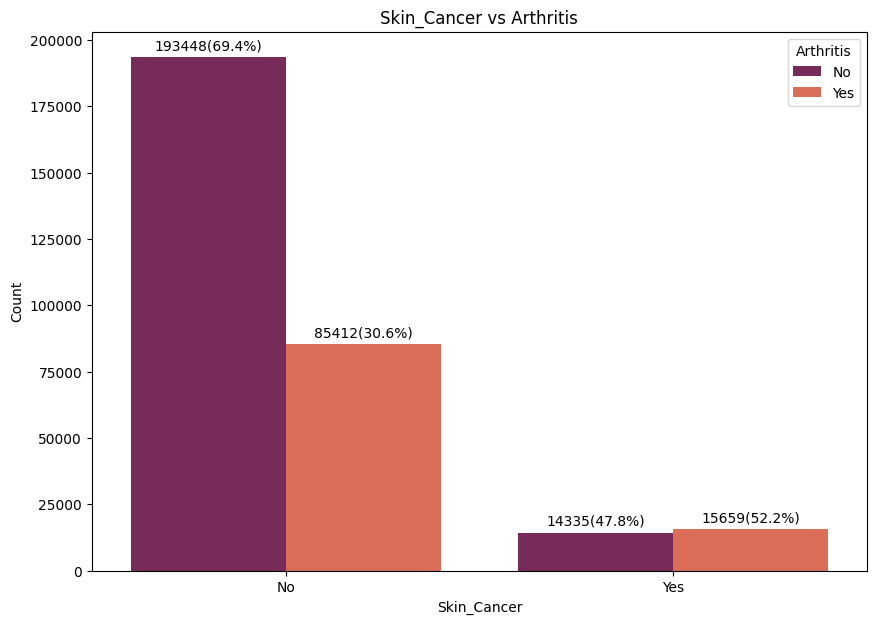

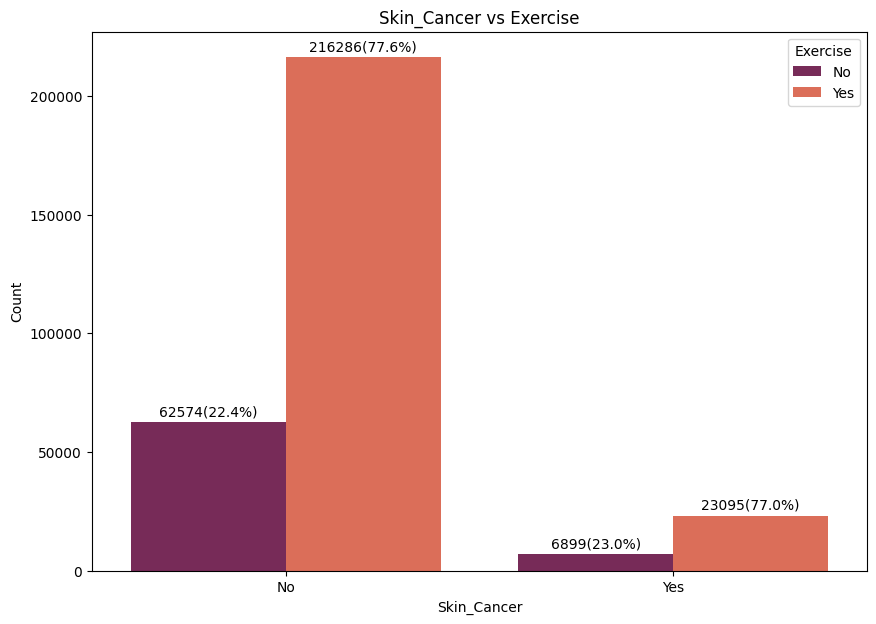

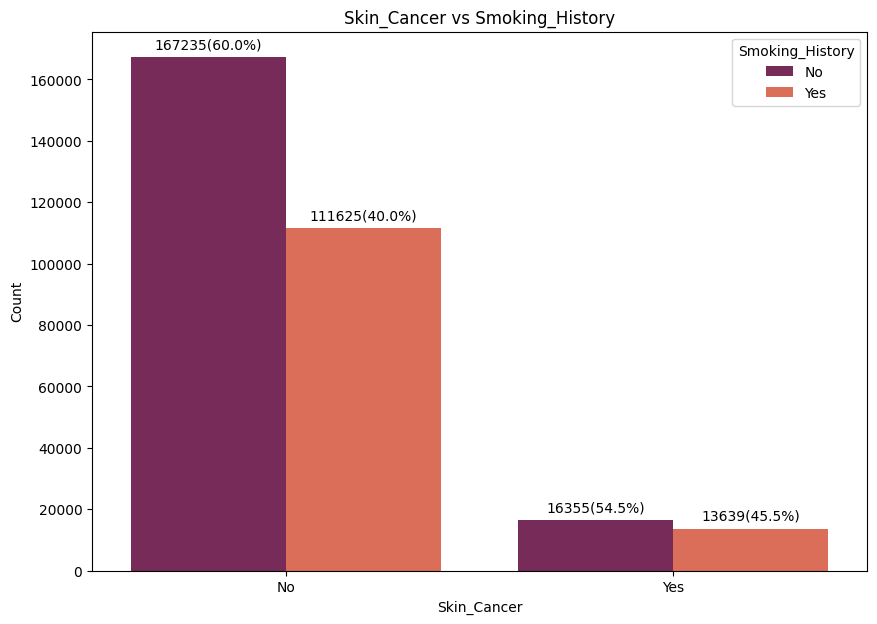

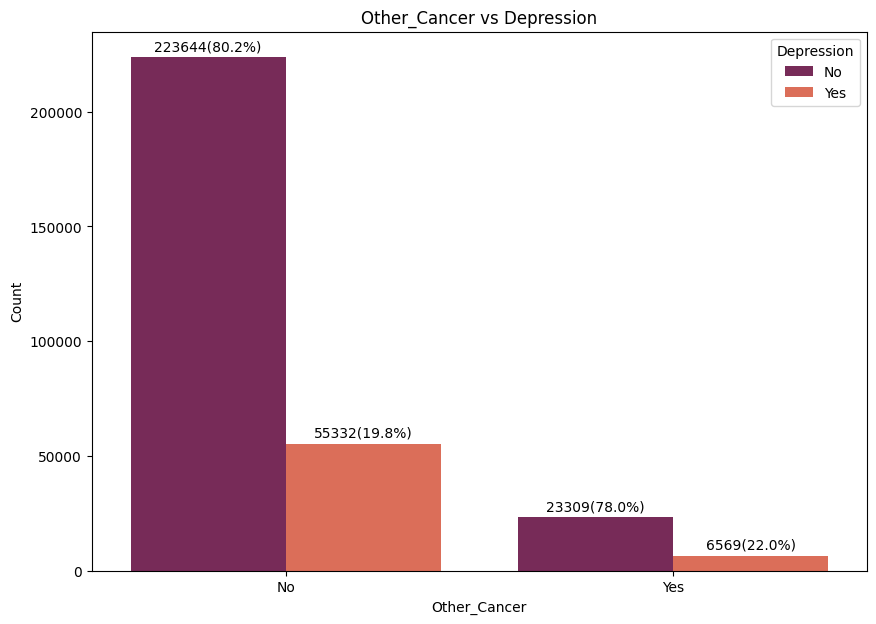

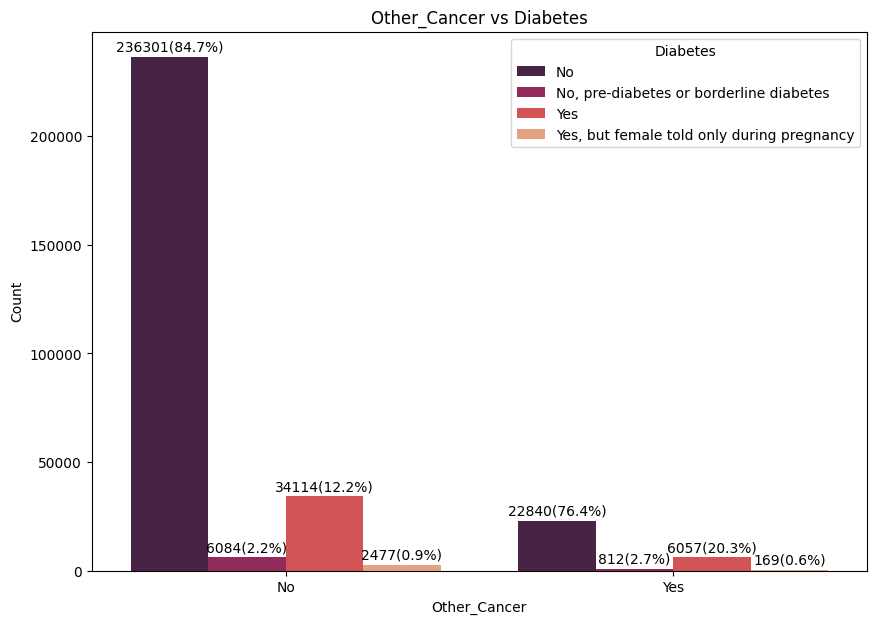

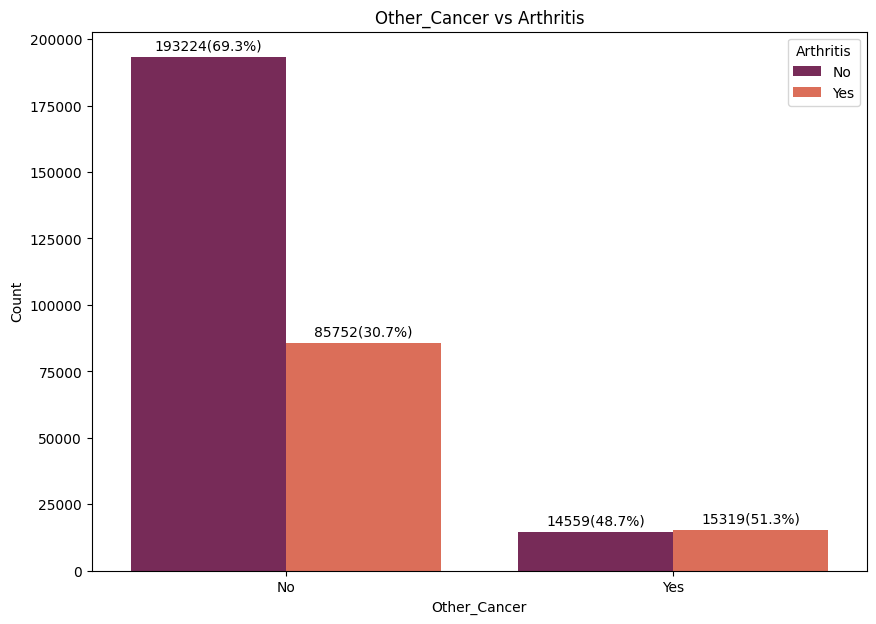

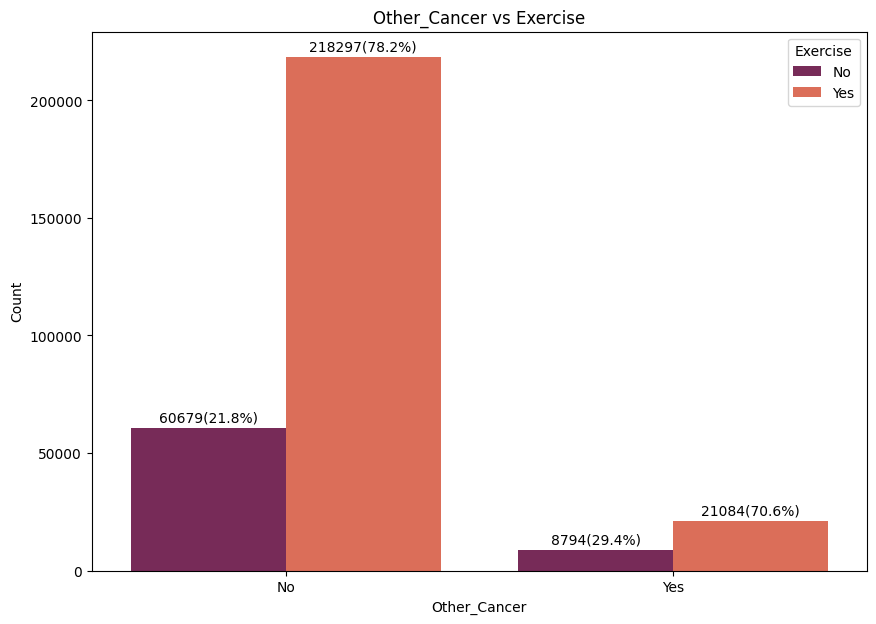

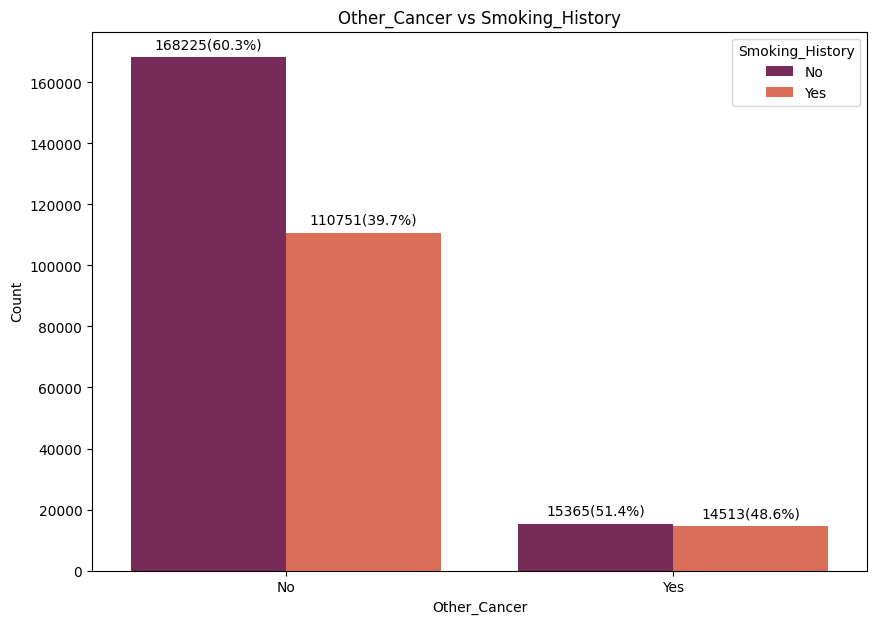

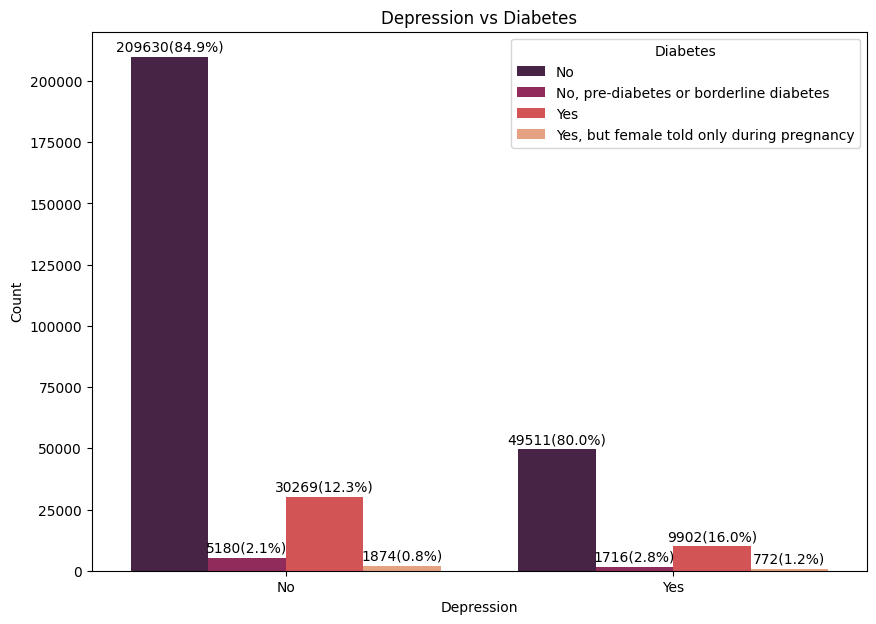

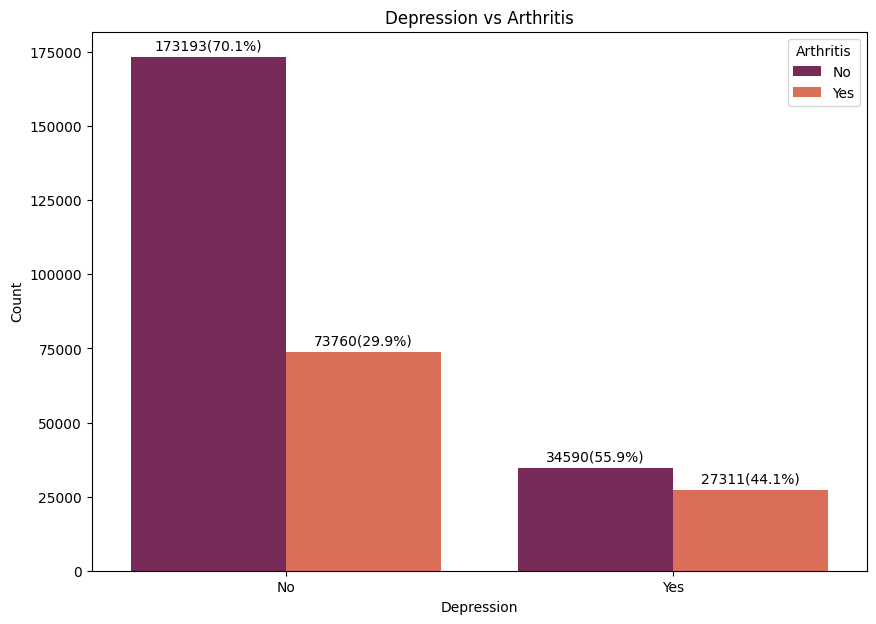

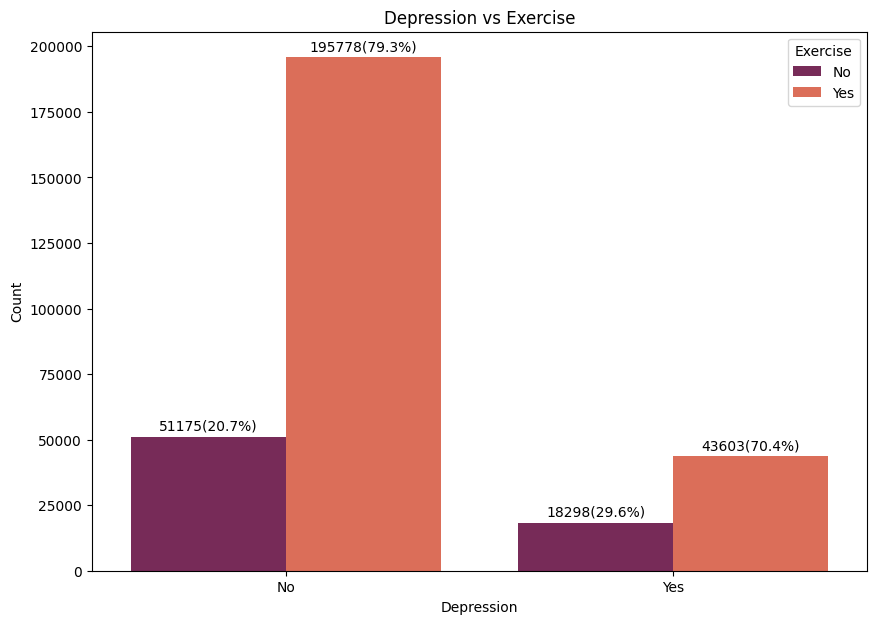

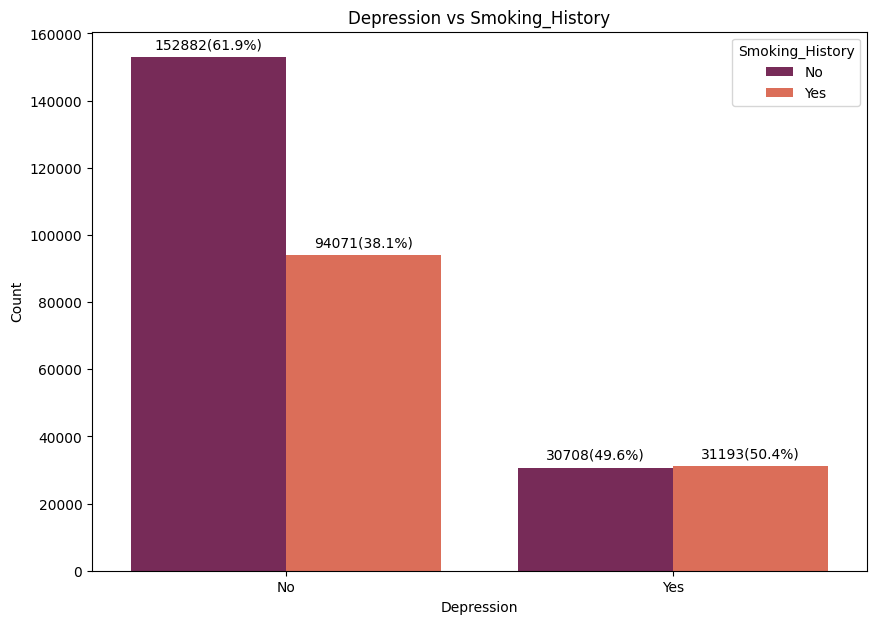

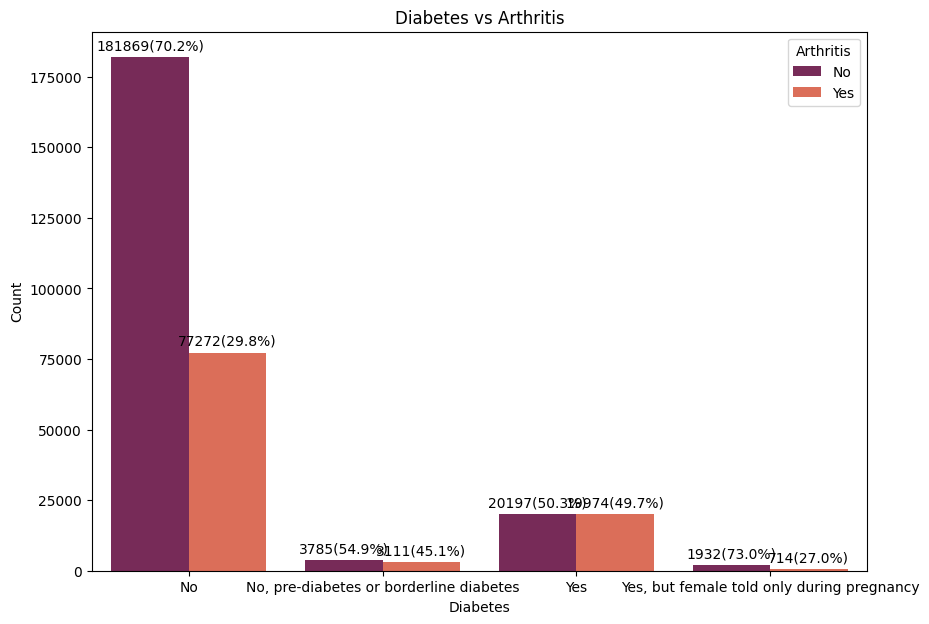

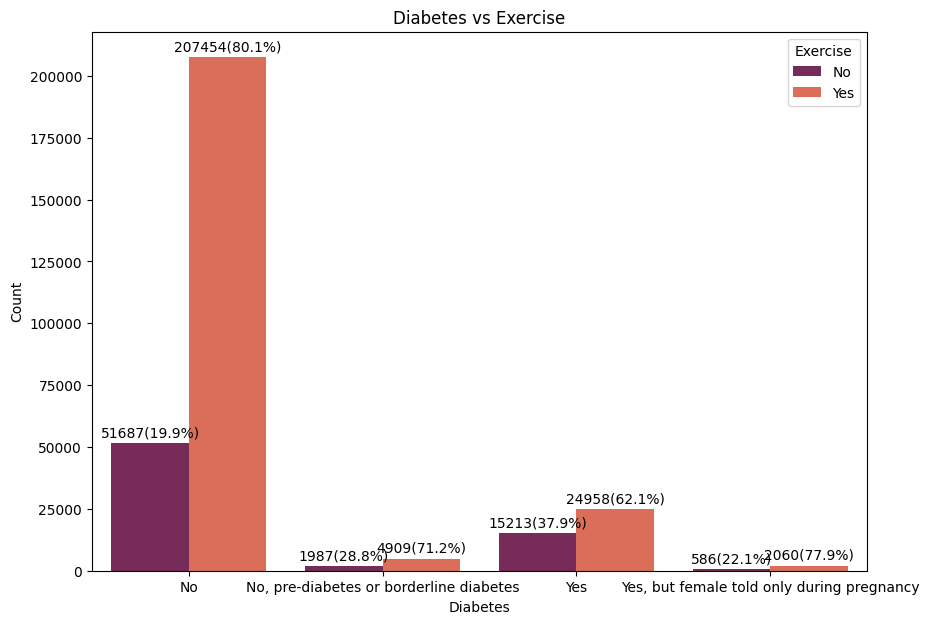

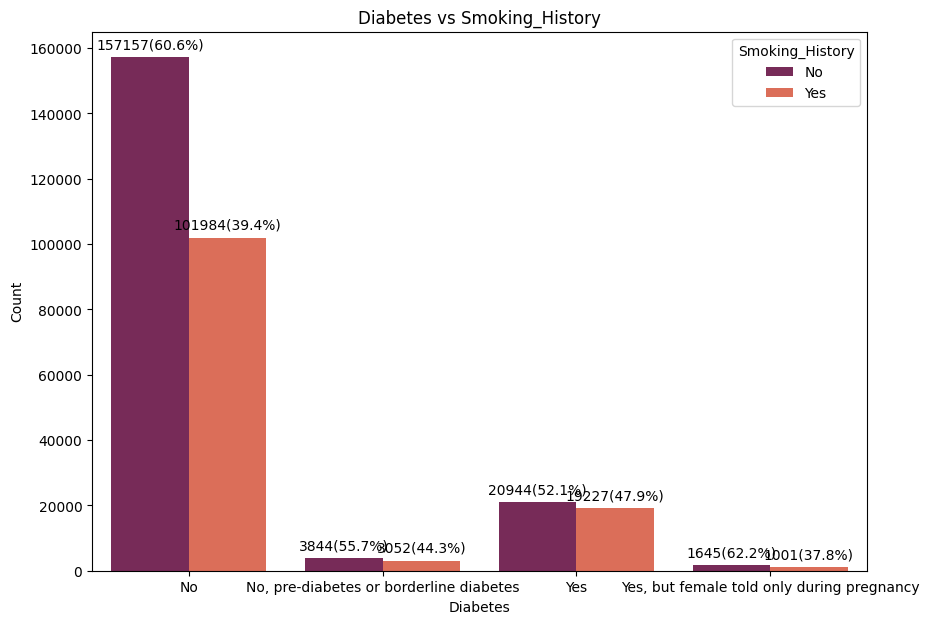

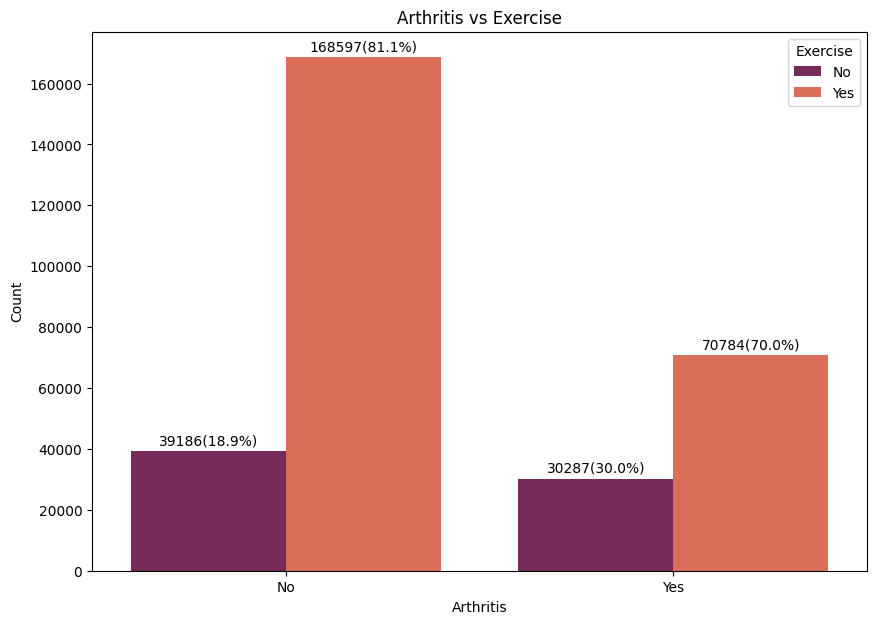

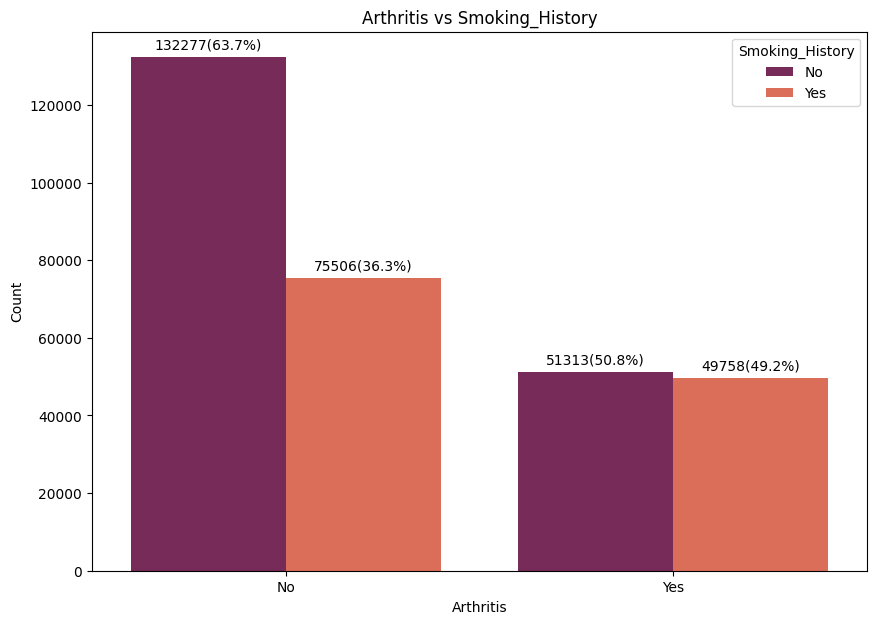

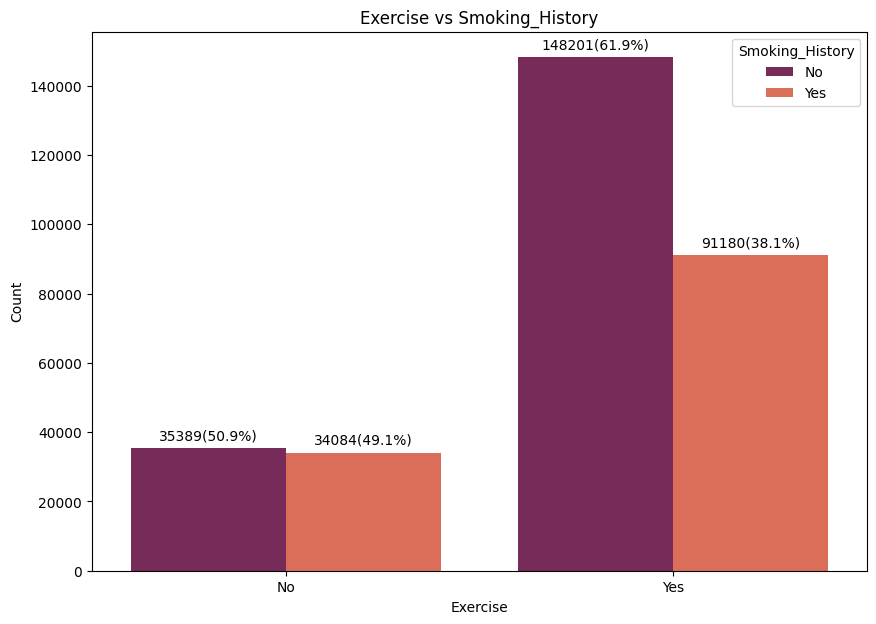

In [ ]:
# Do bivariate categorical analysis
for i in range(len(categorical_columns)-1):
  for j in range(i+1,len(categorical_columns)):
    left = categorical_columns[i]
    right = categorical_columns[j]
    bivariate_categorical(data, left, right)

<h3>Numeric vs Categorical Analysis</h3>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


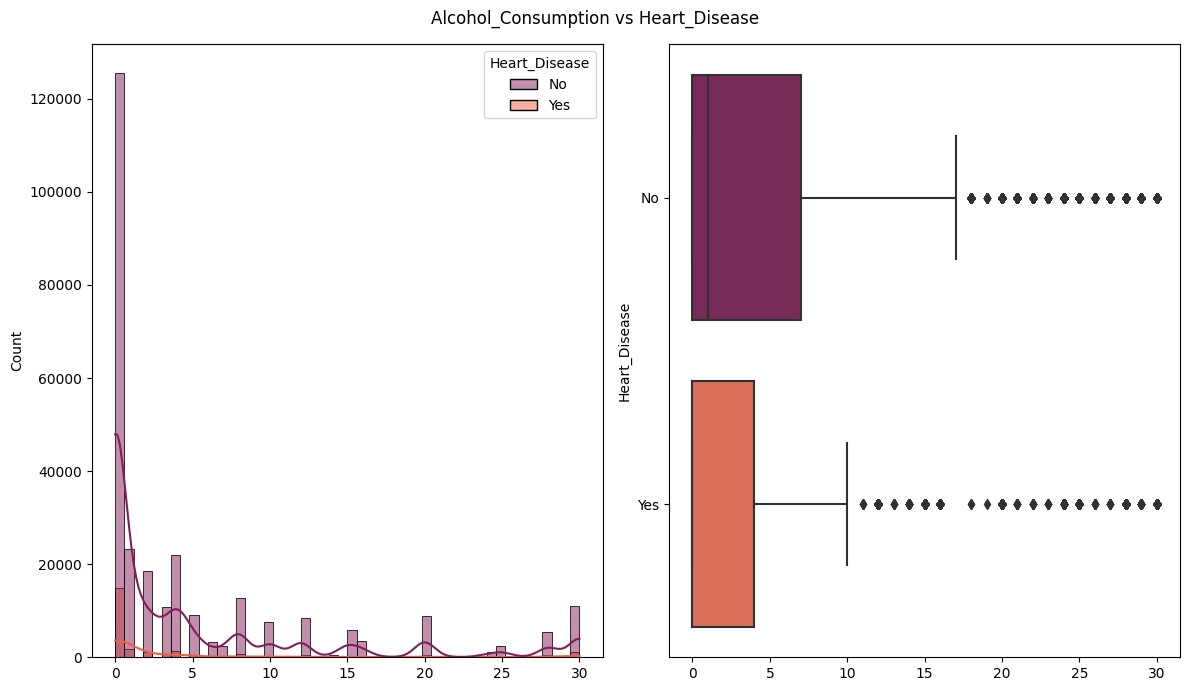

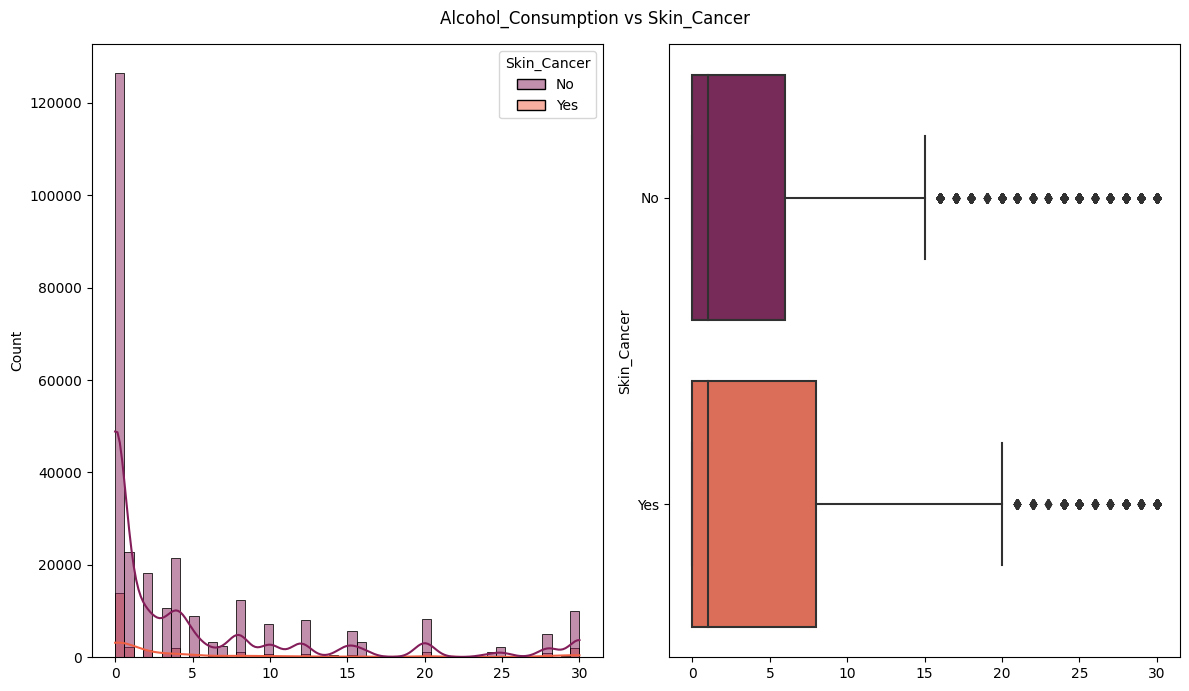

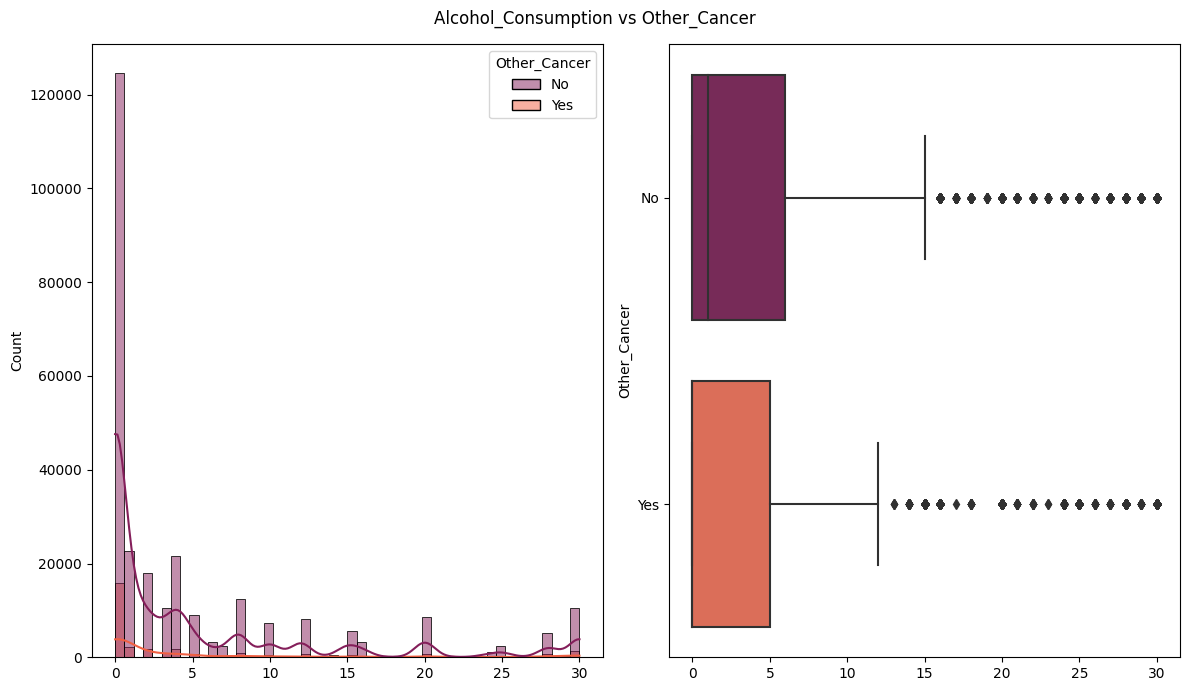

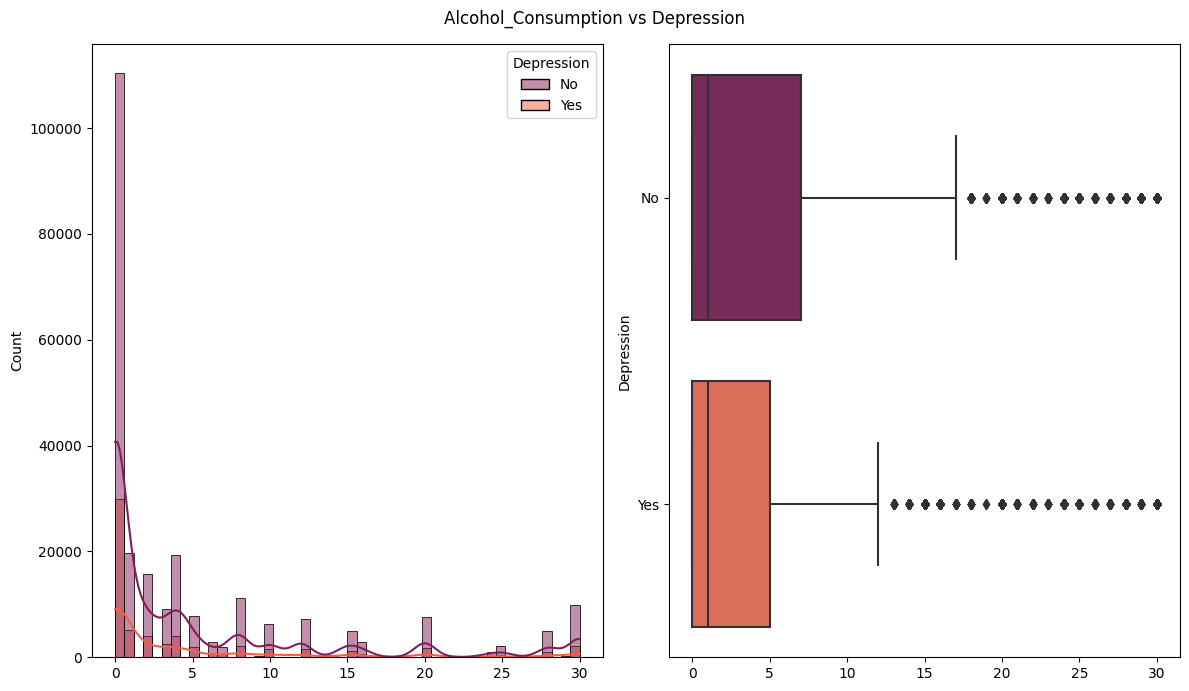

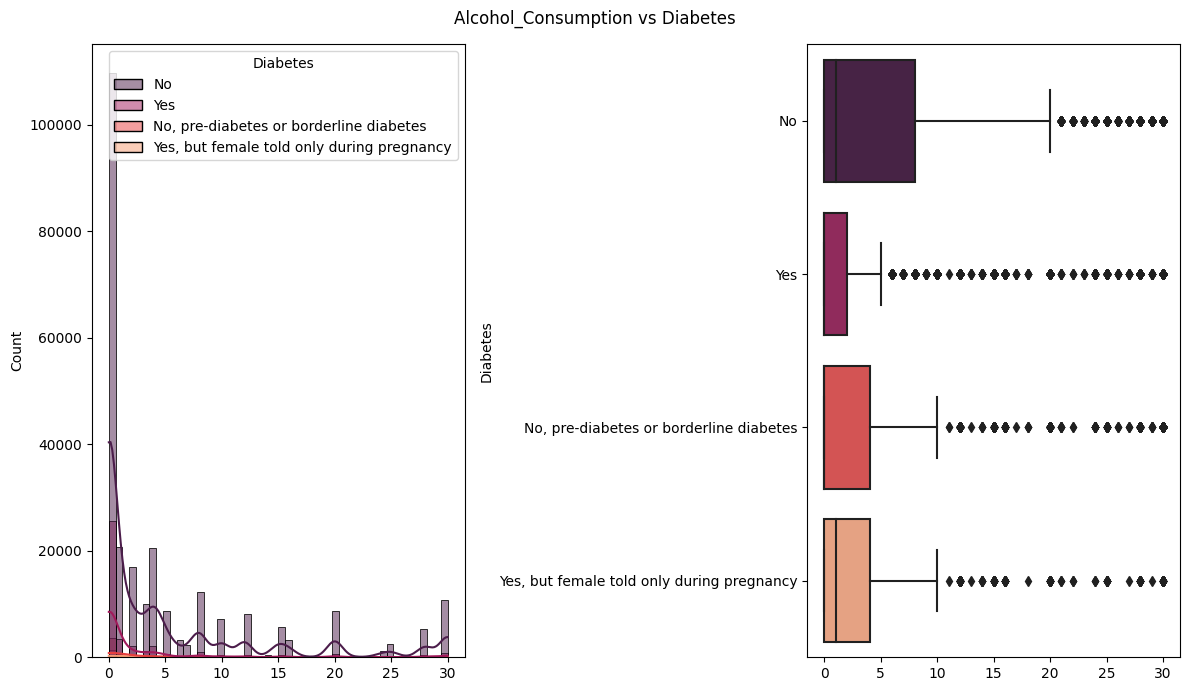

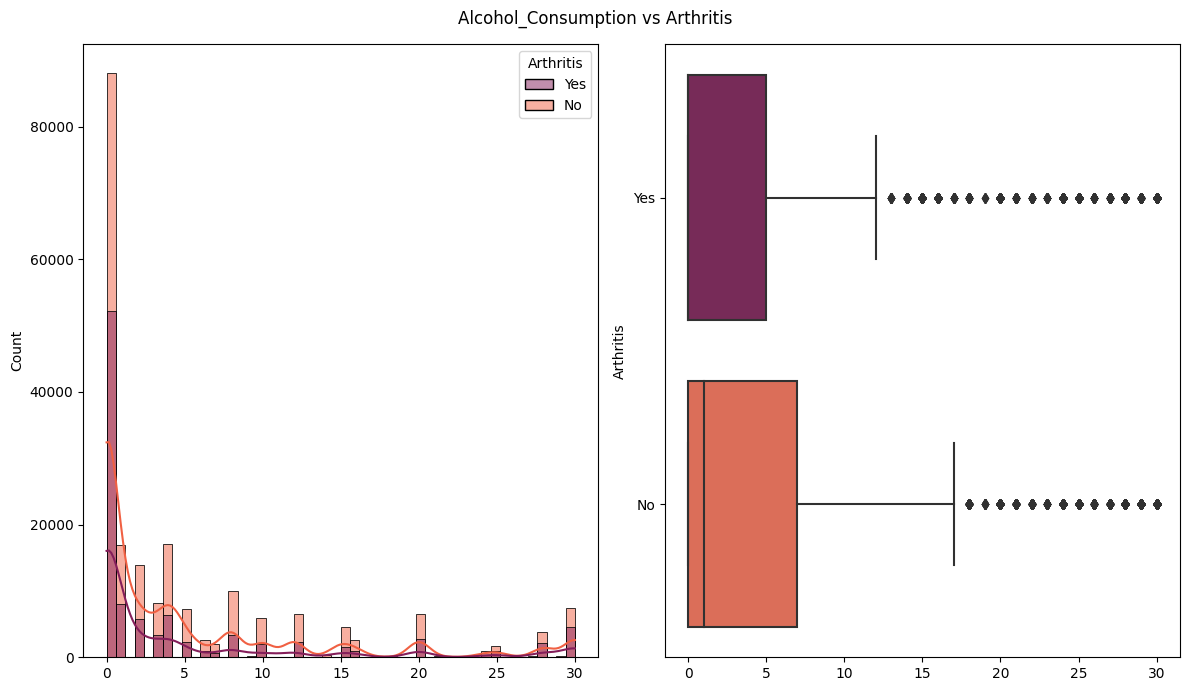

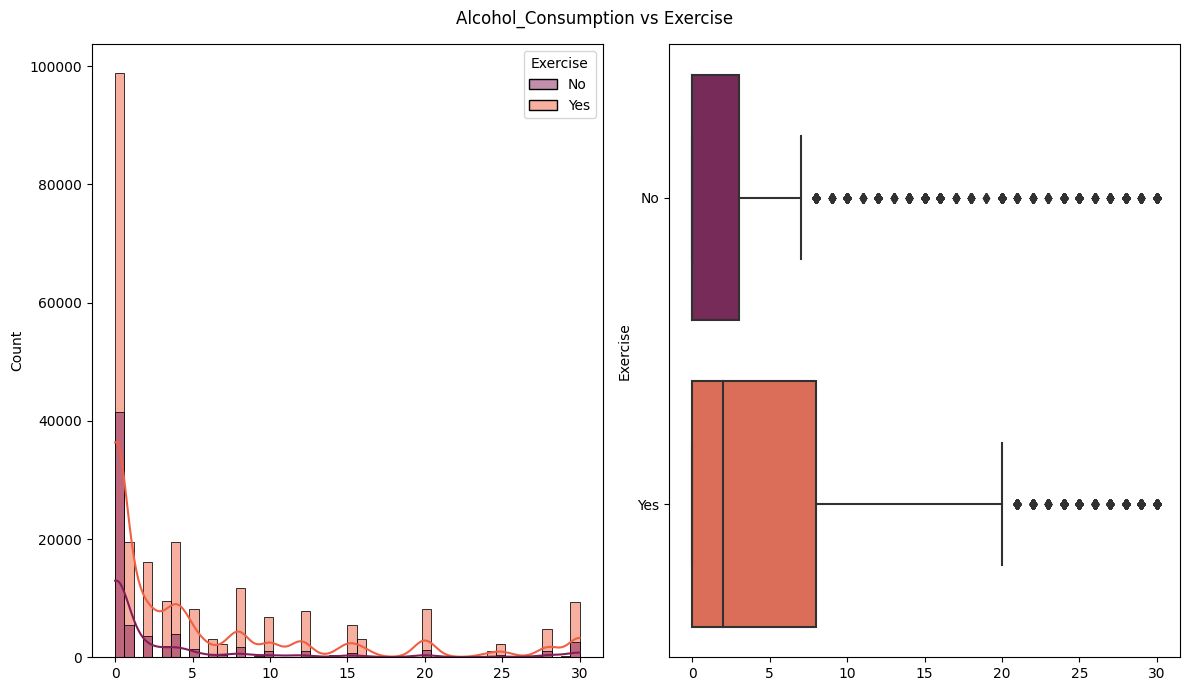

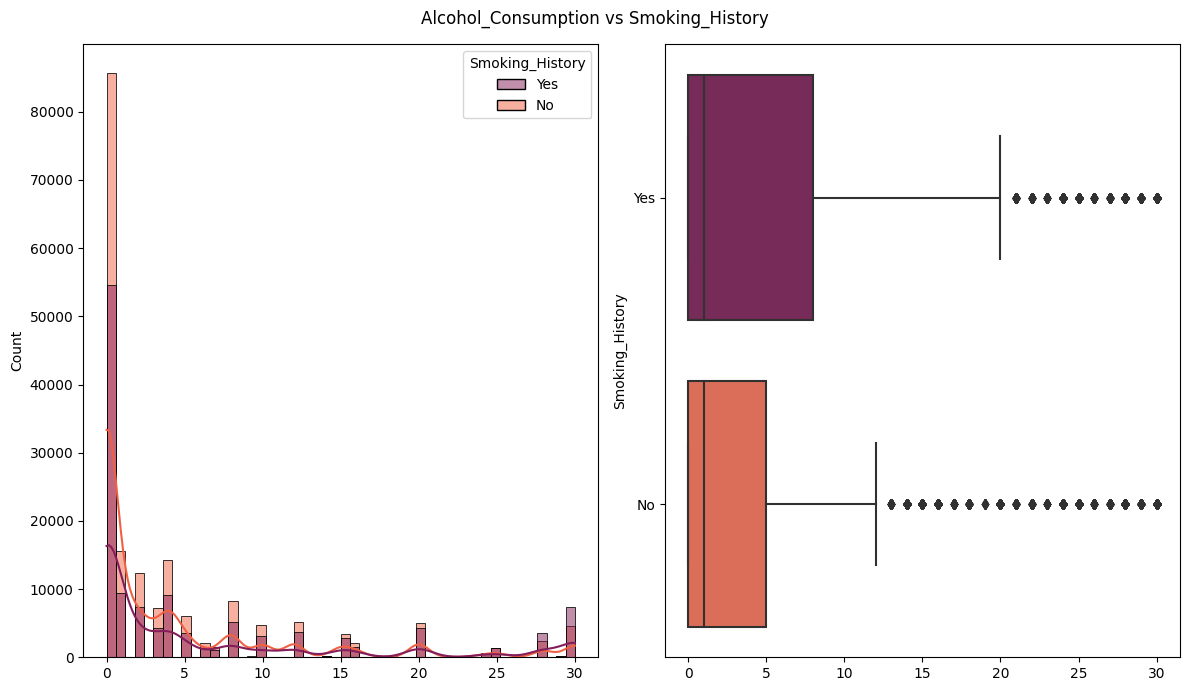

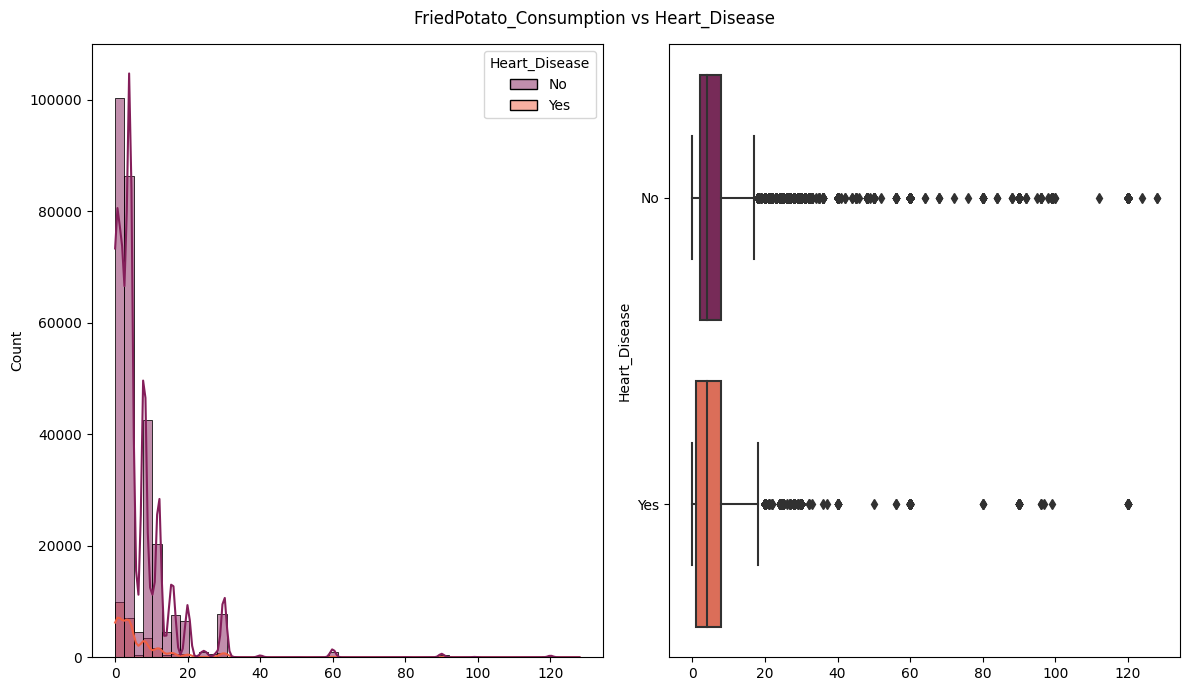

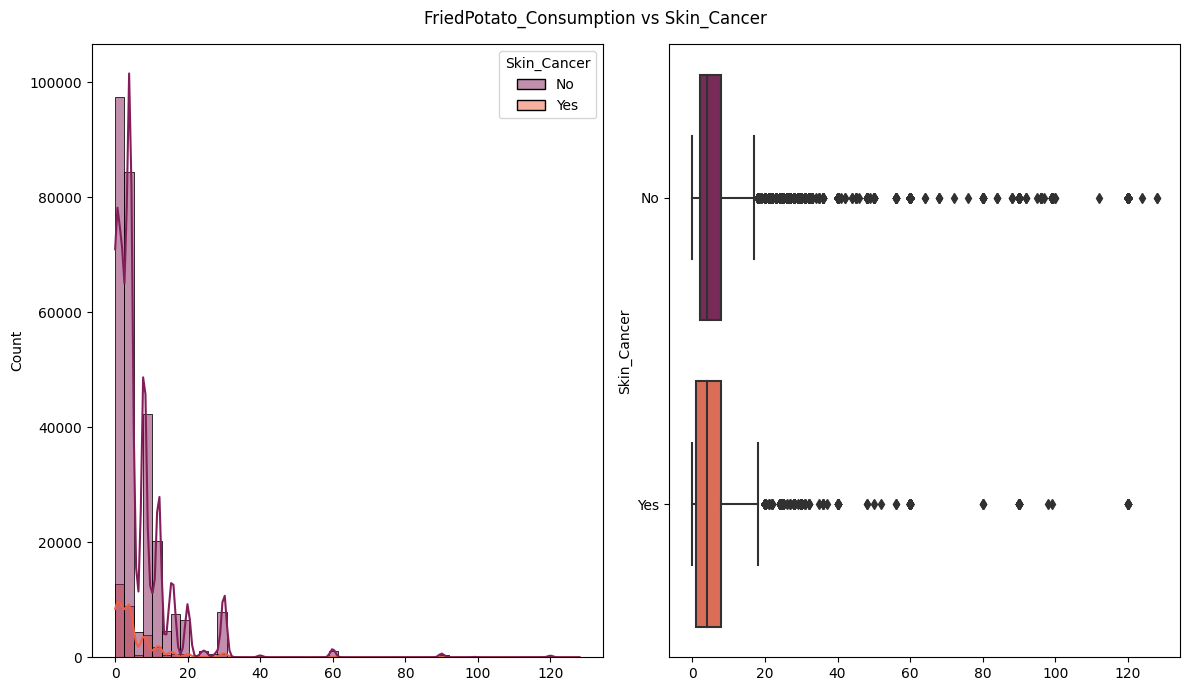

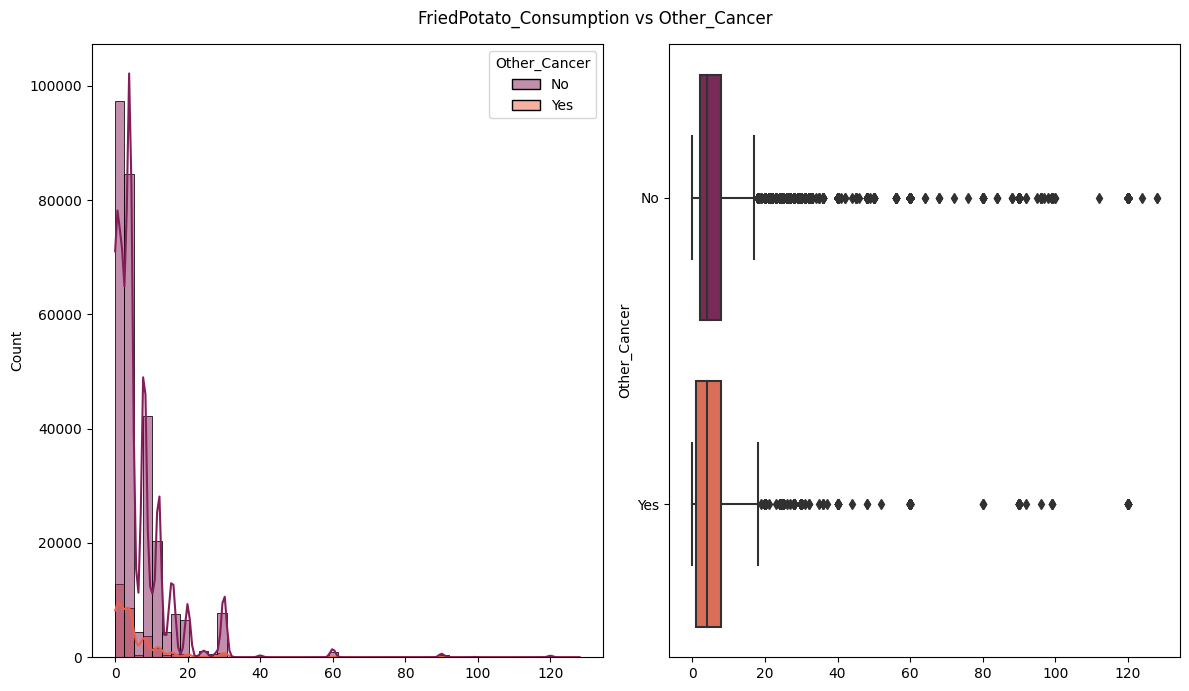

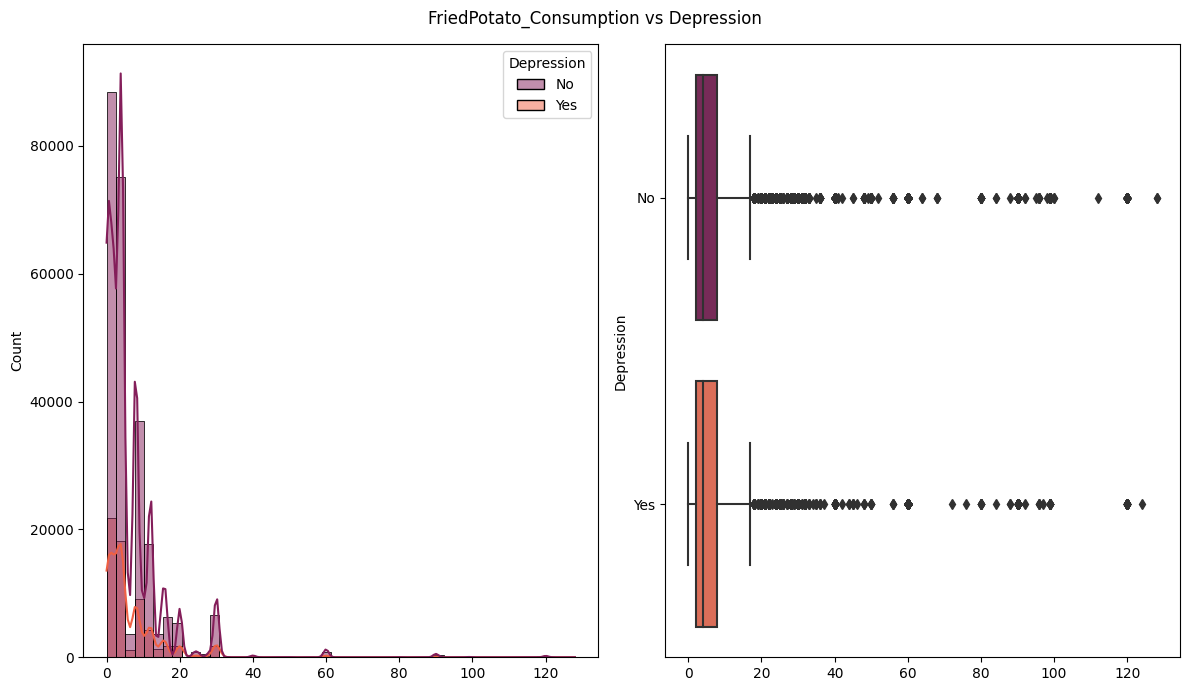

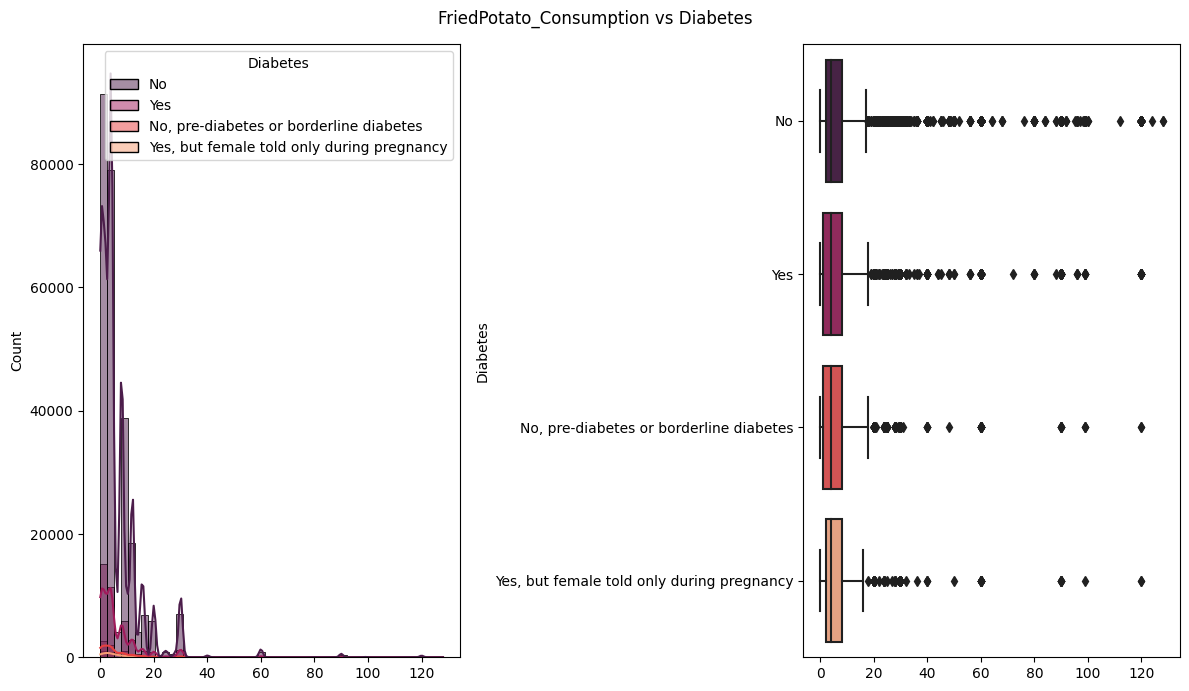

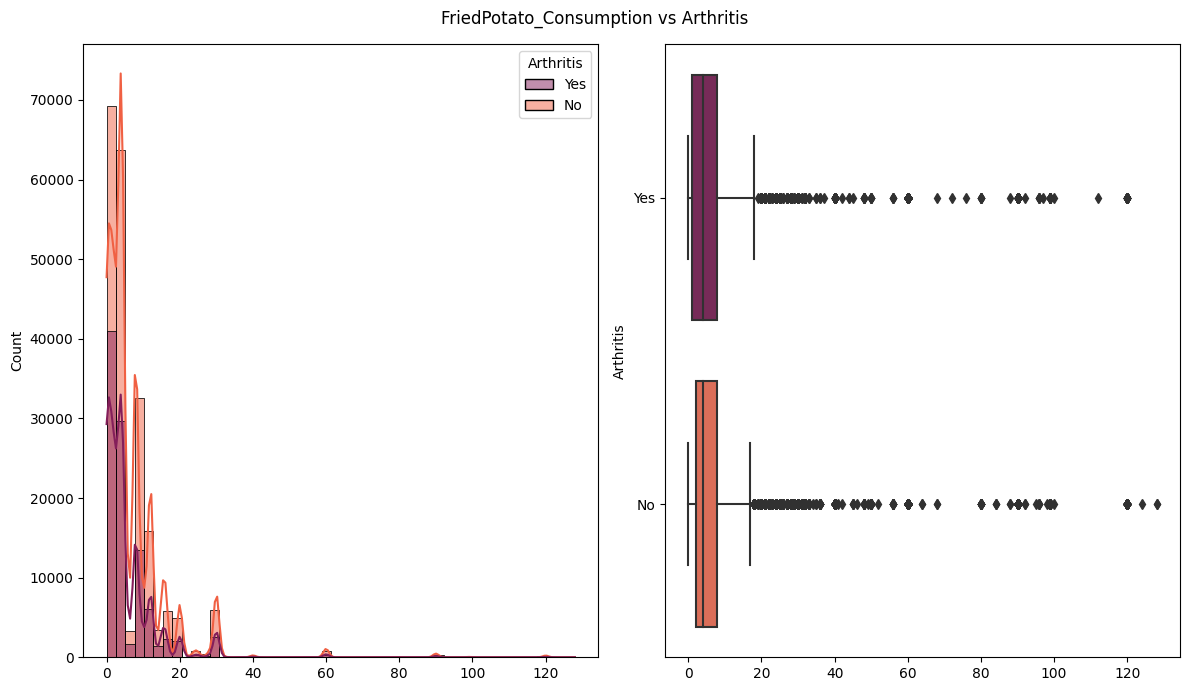

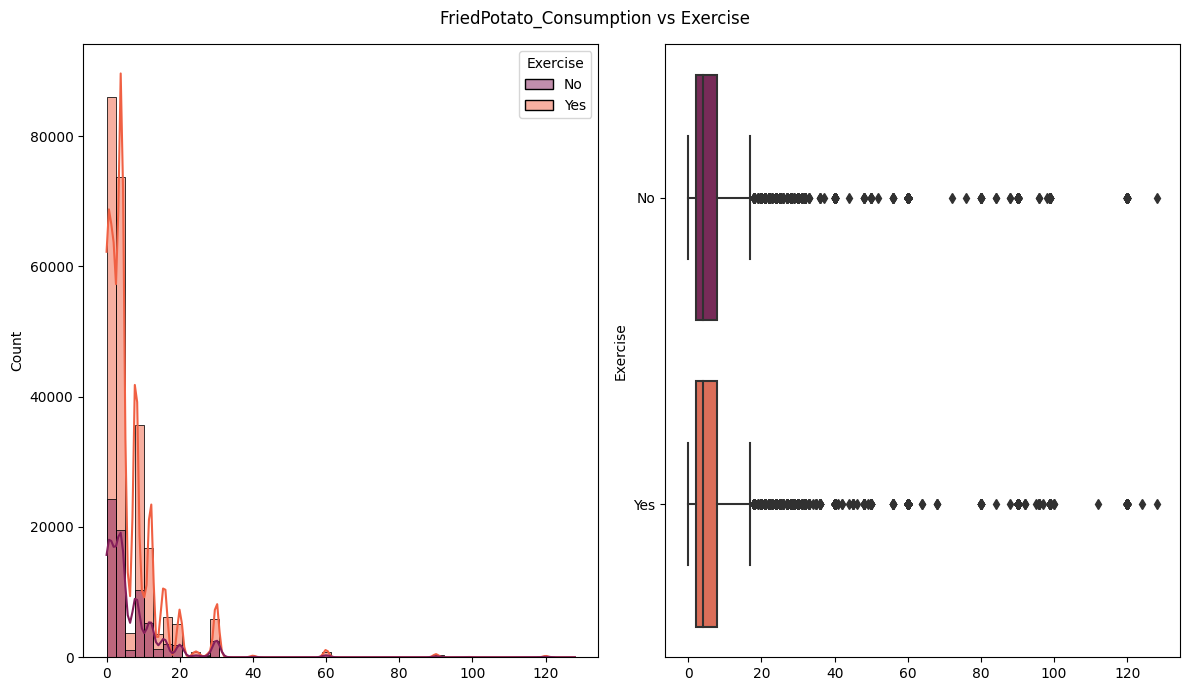

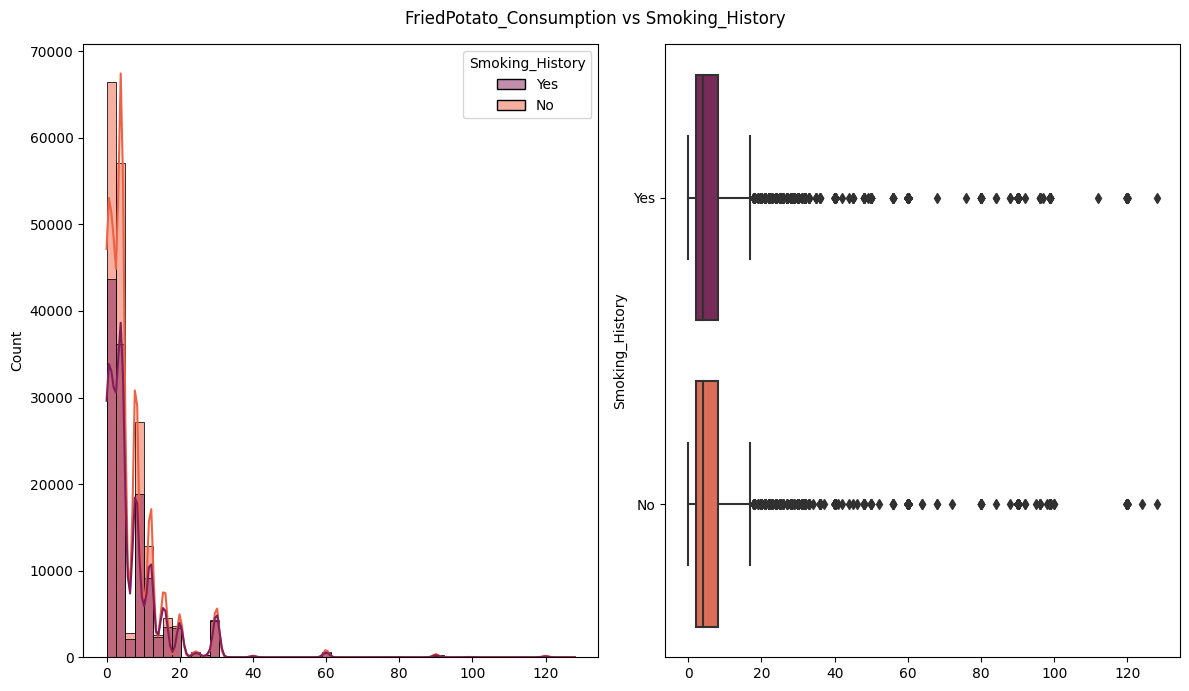

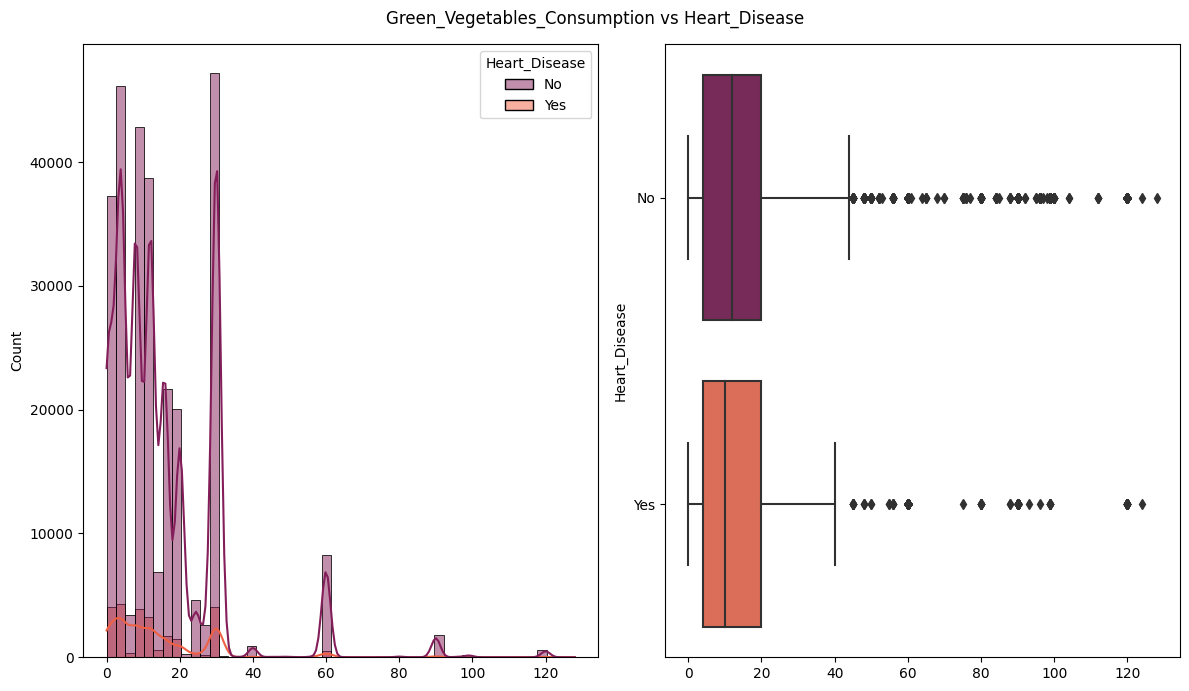

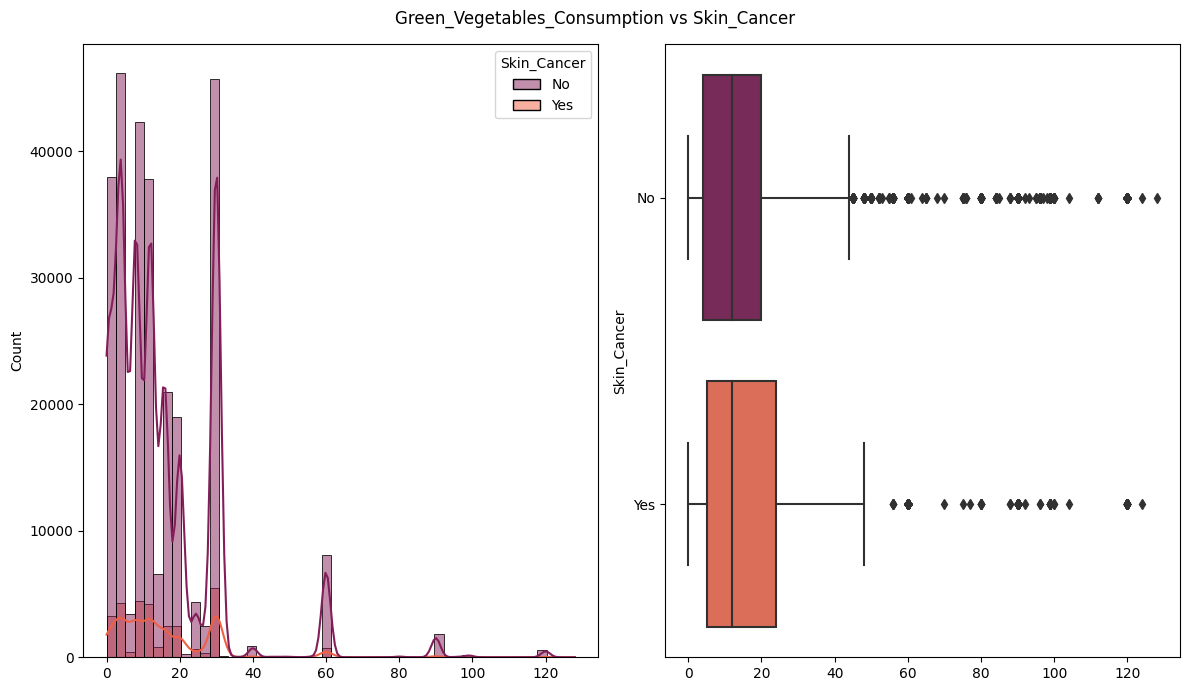

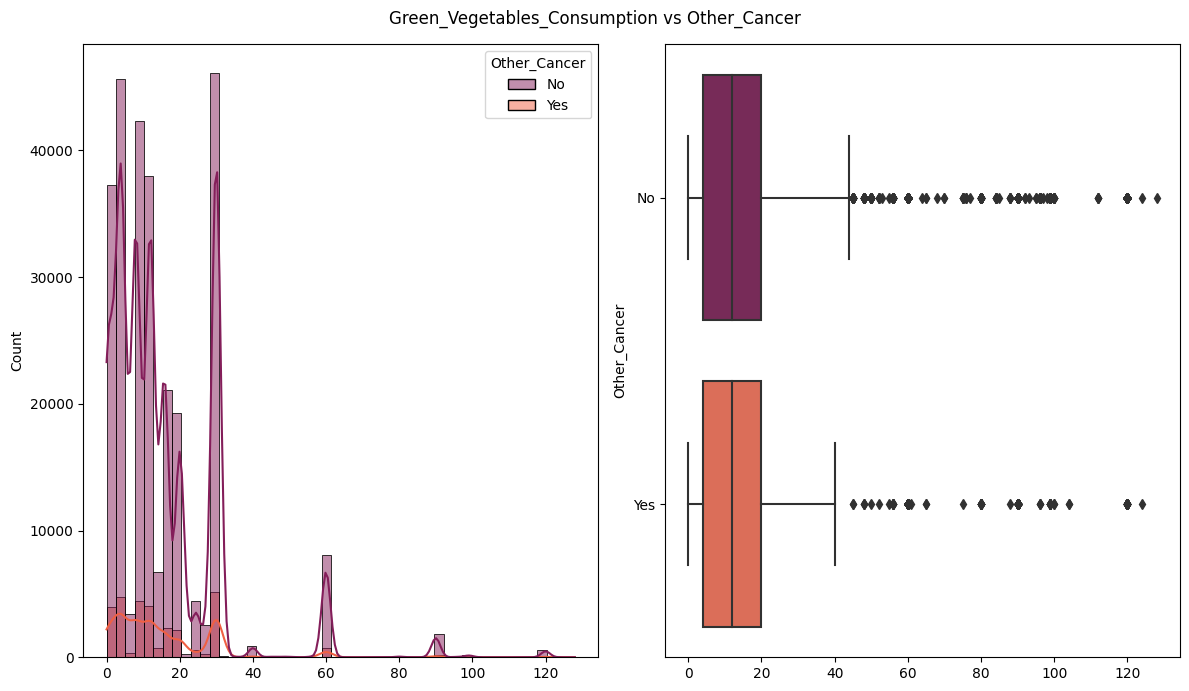

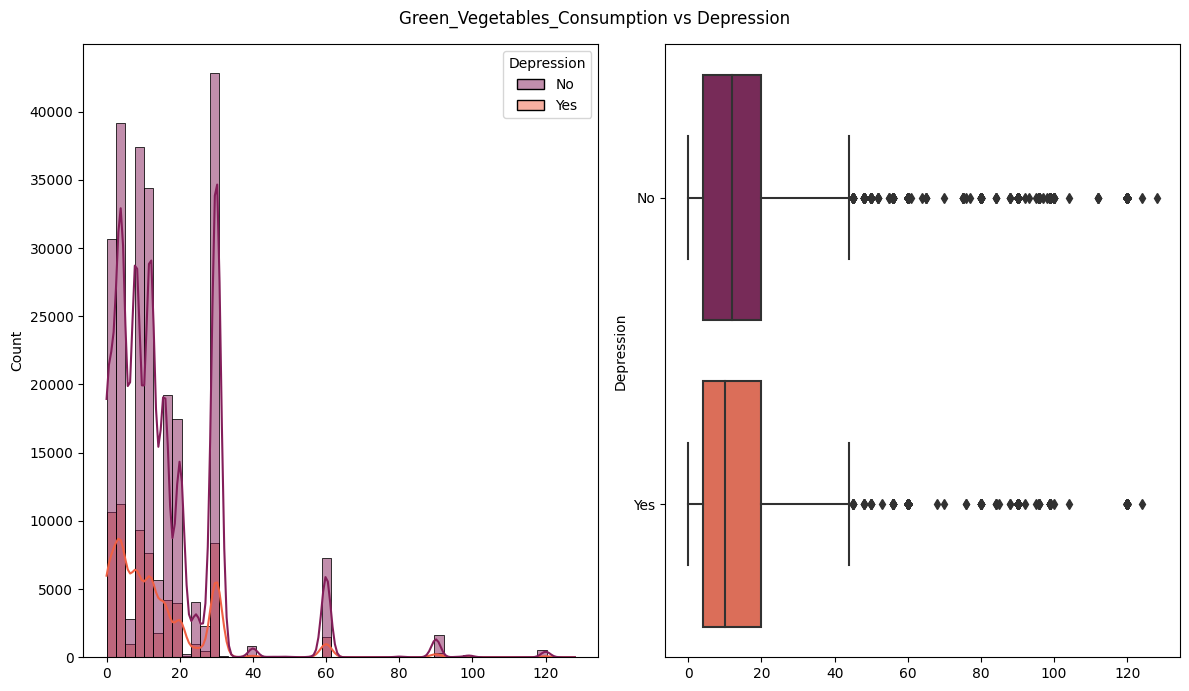

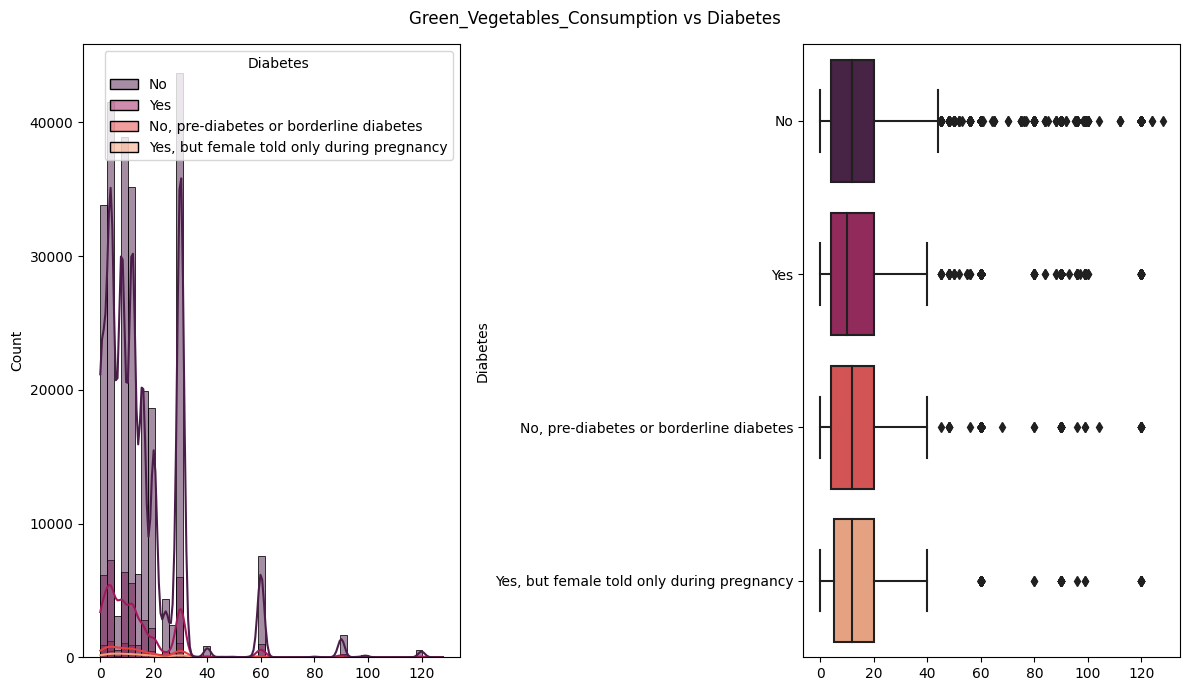

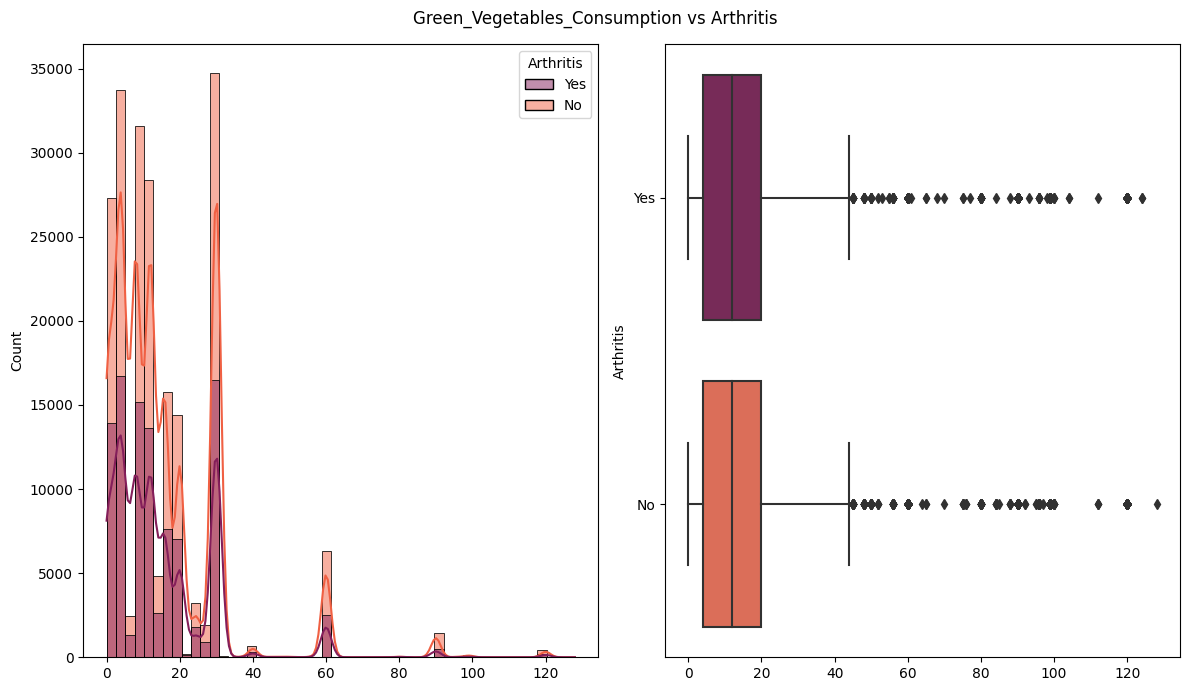

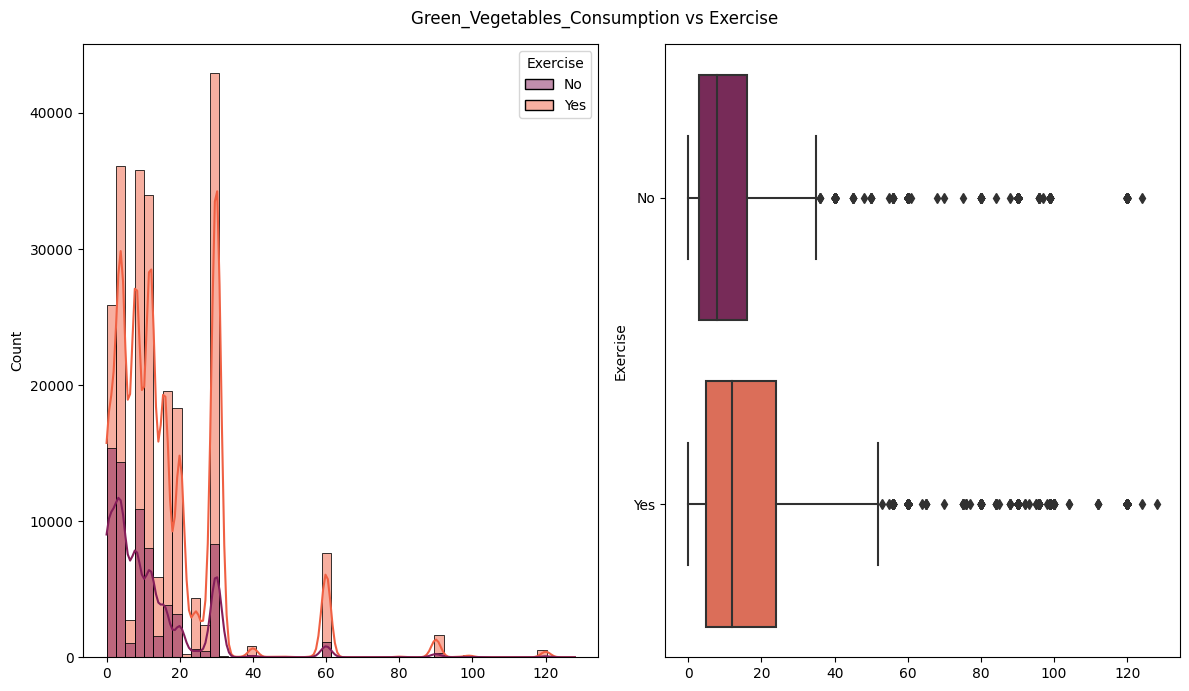

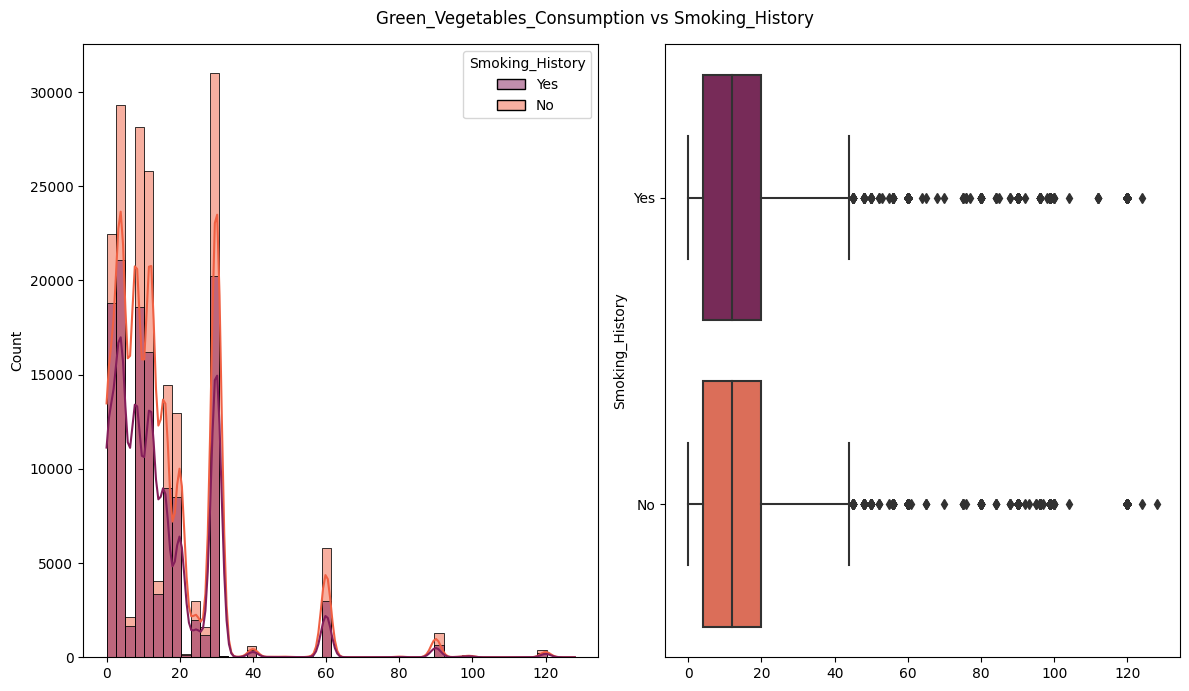

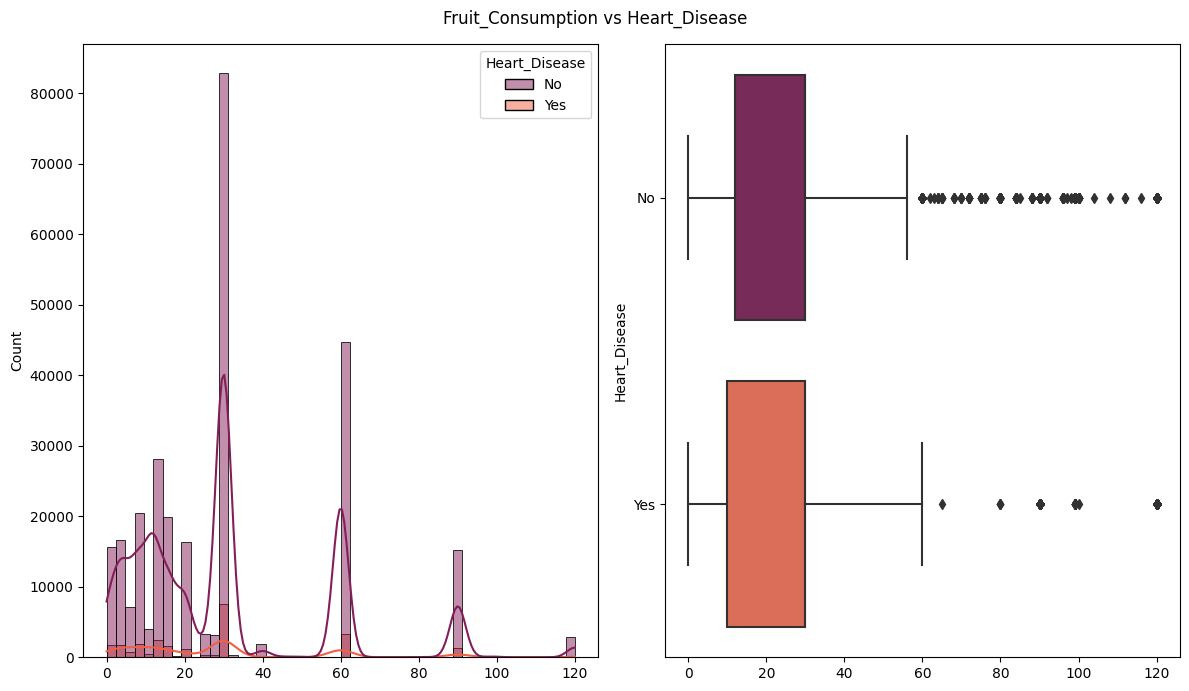

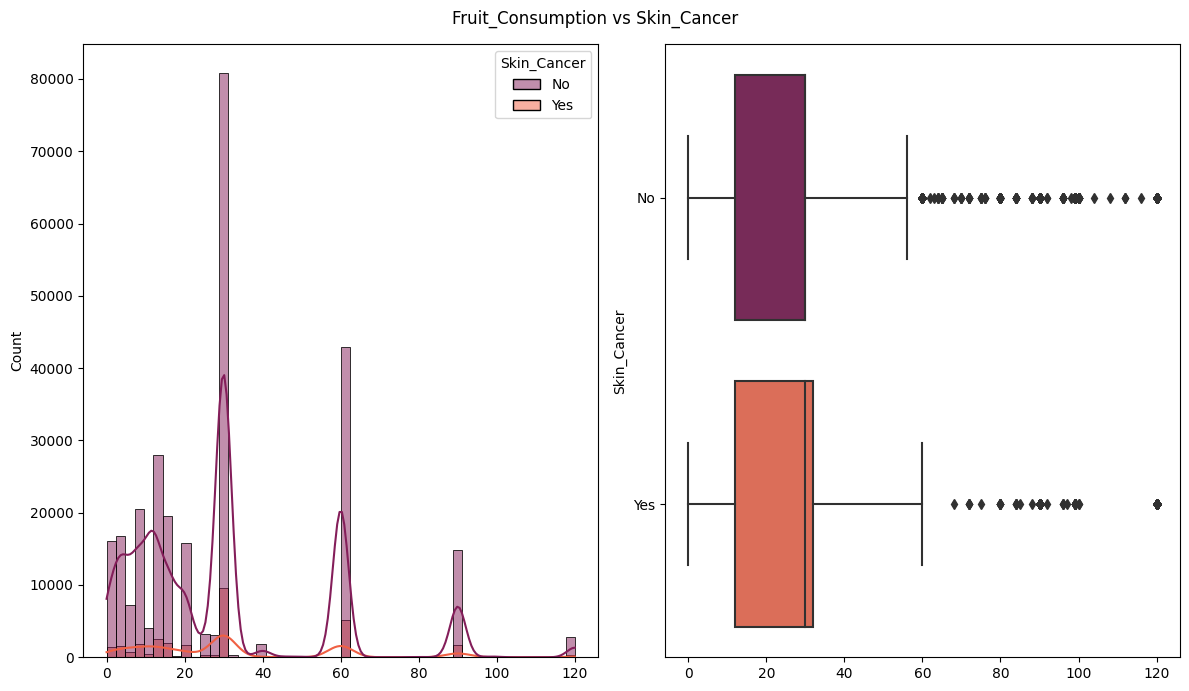

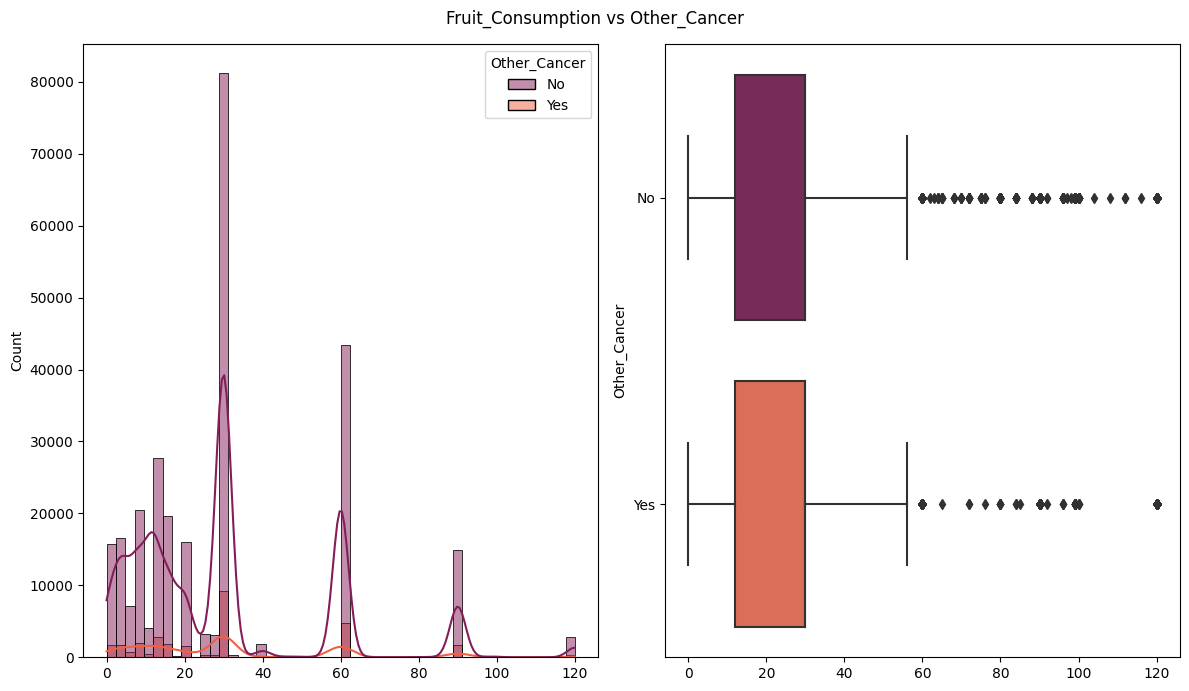

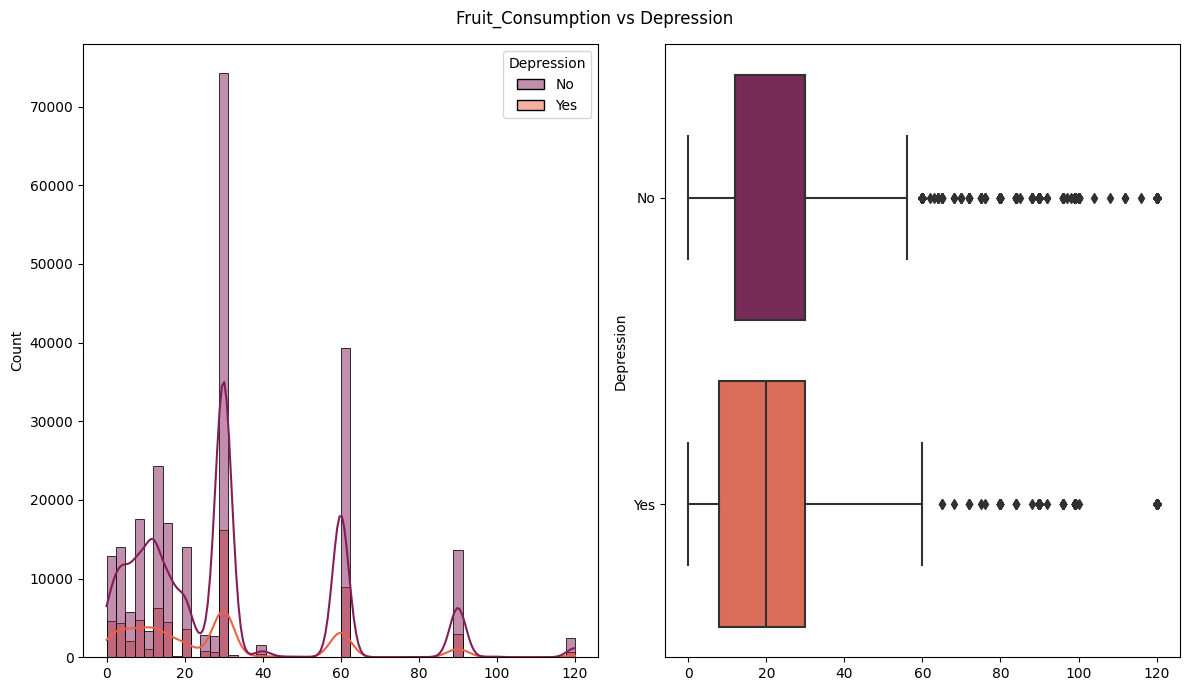

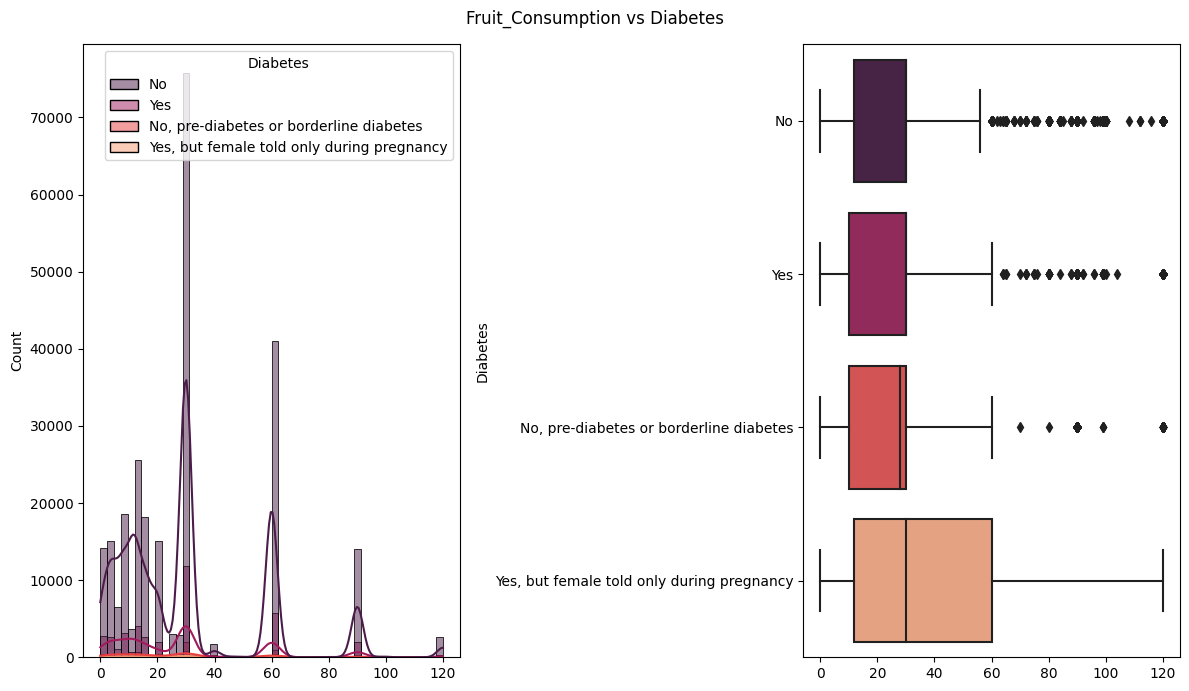

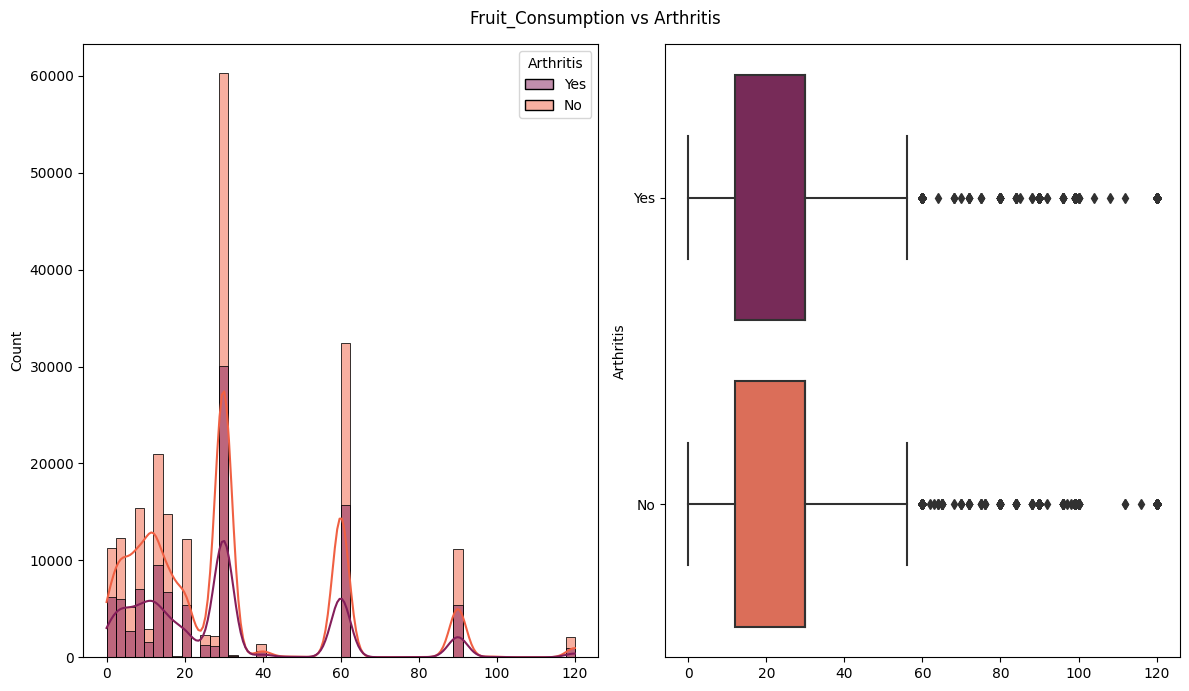

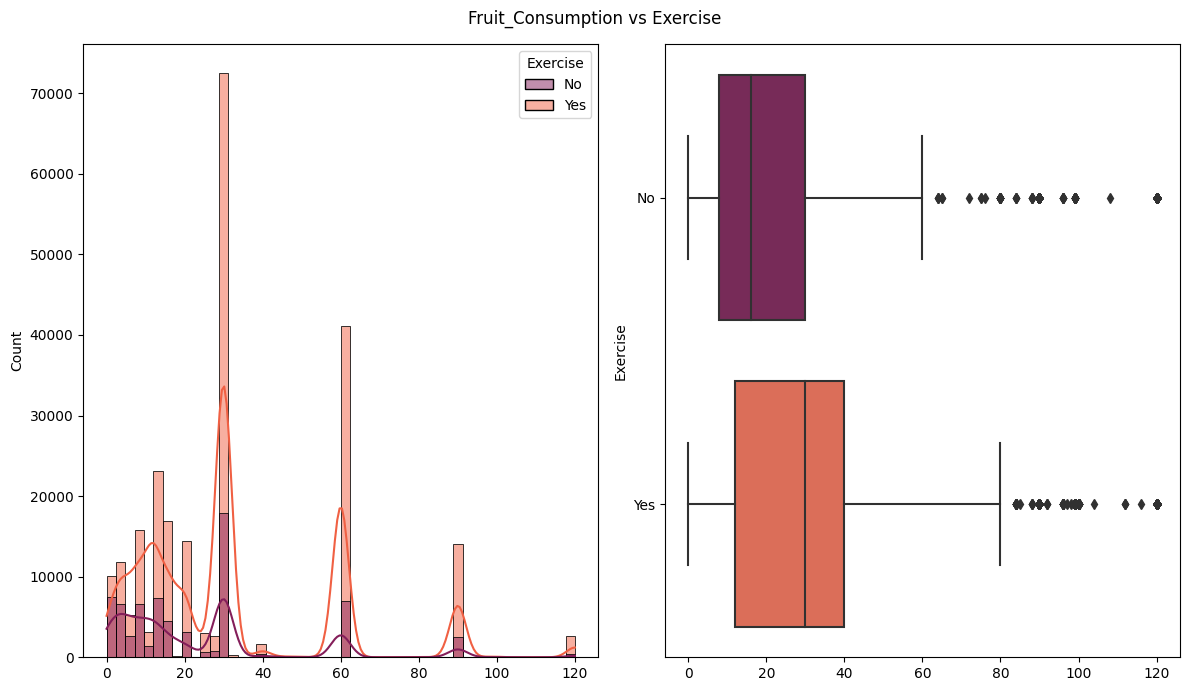

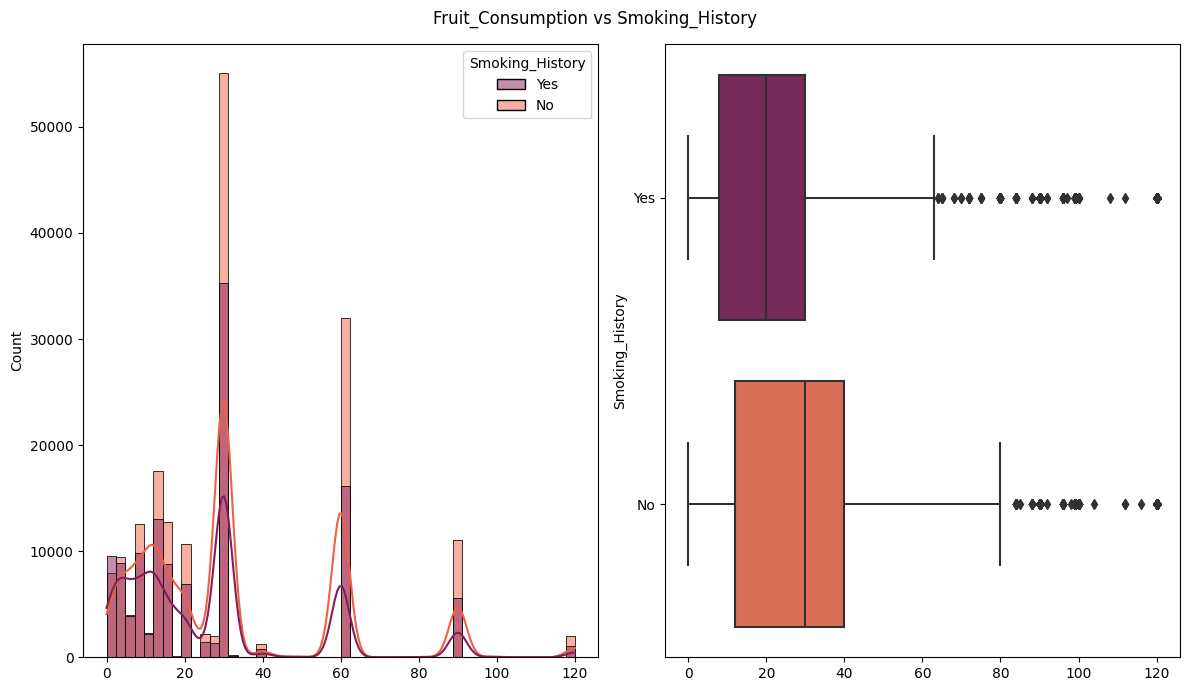

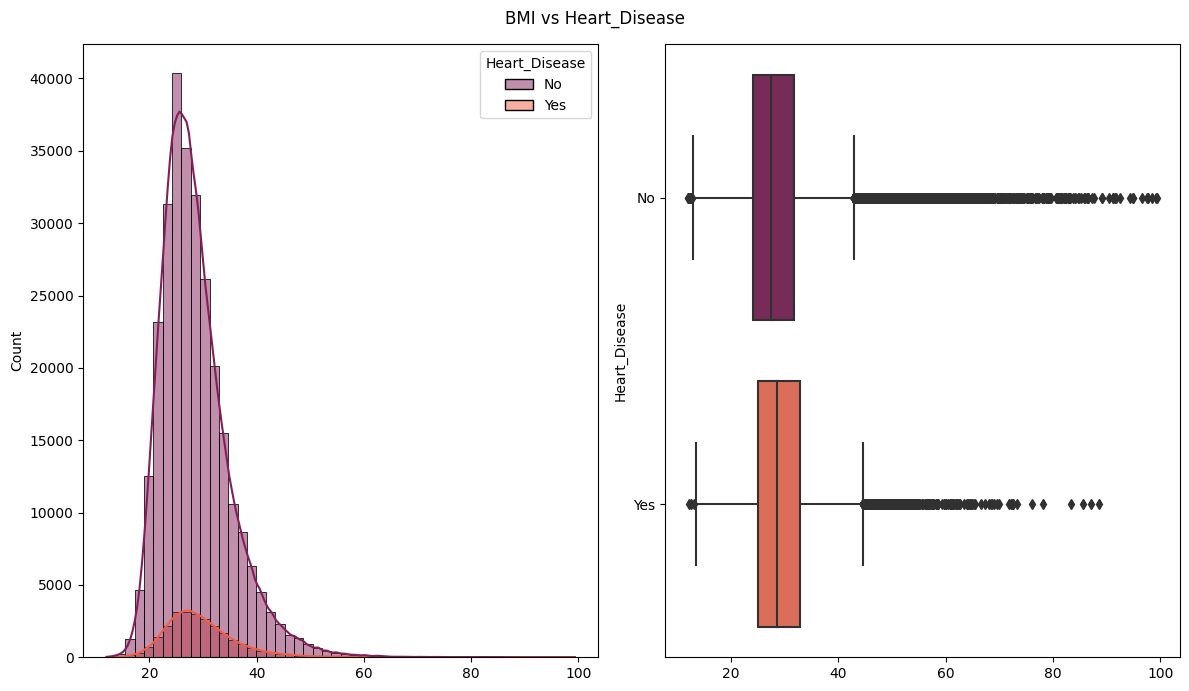

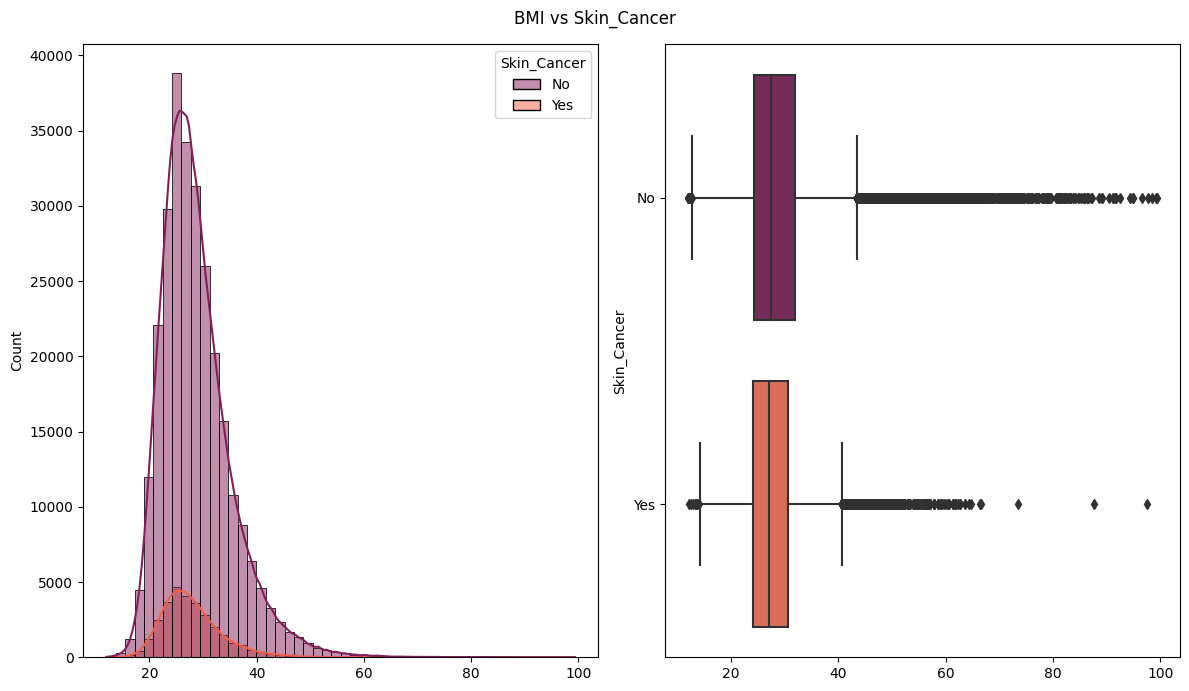

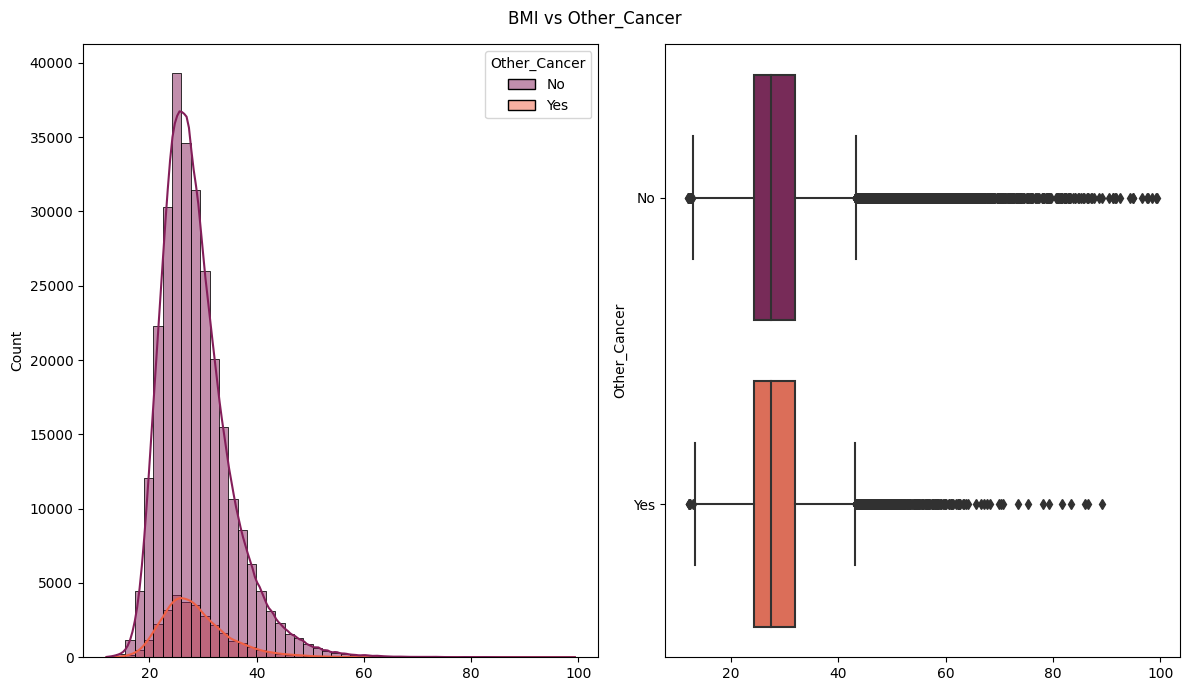

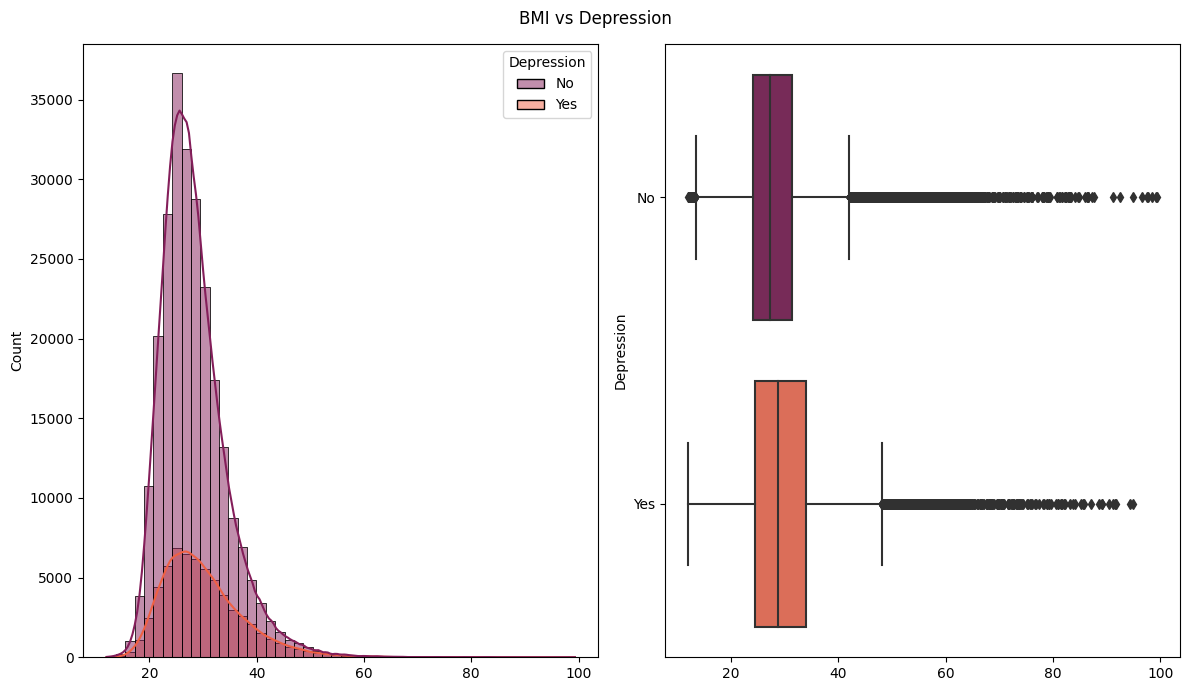

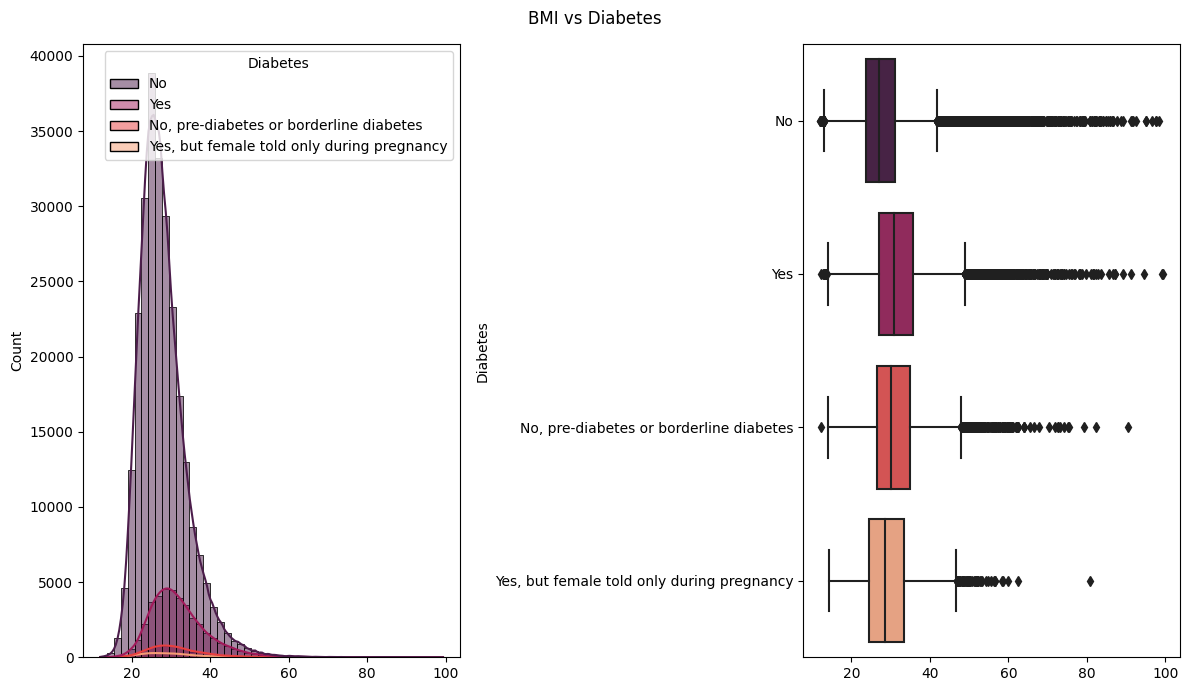

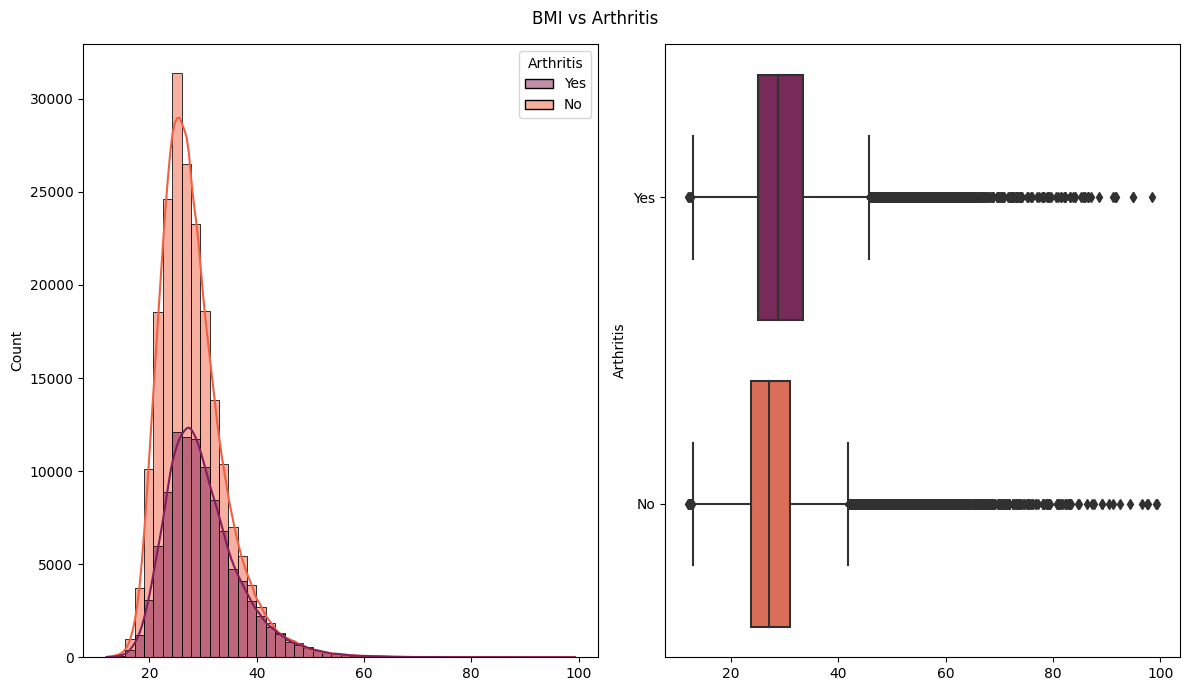

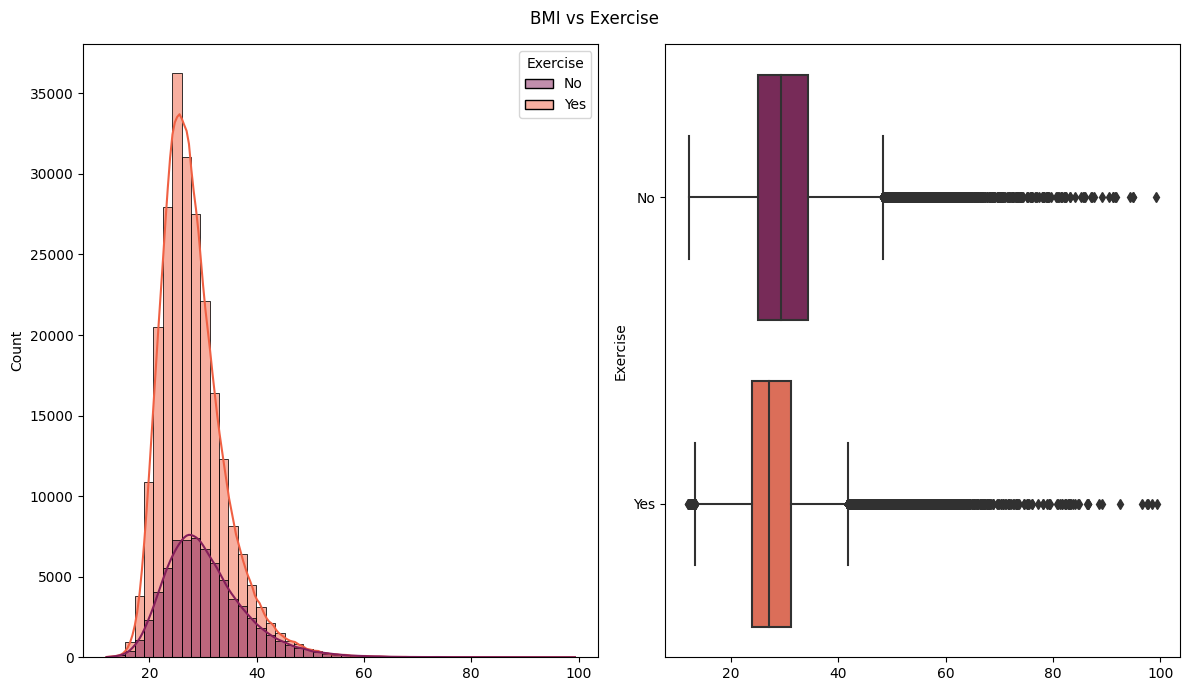

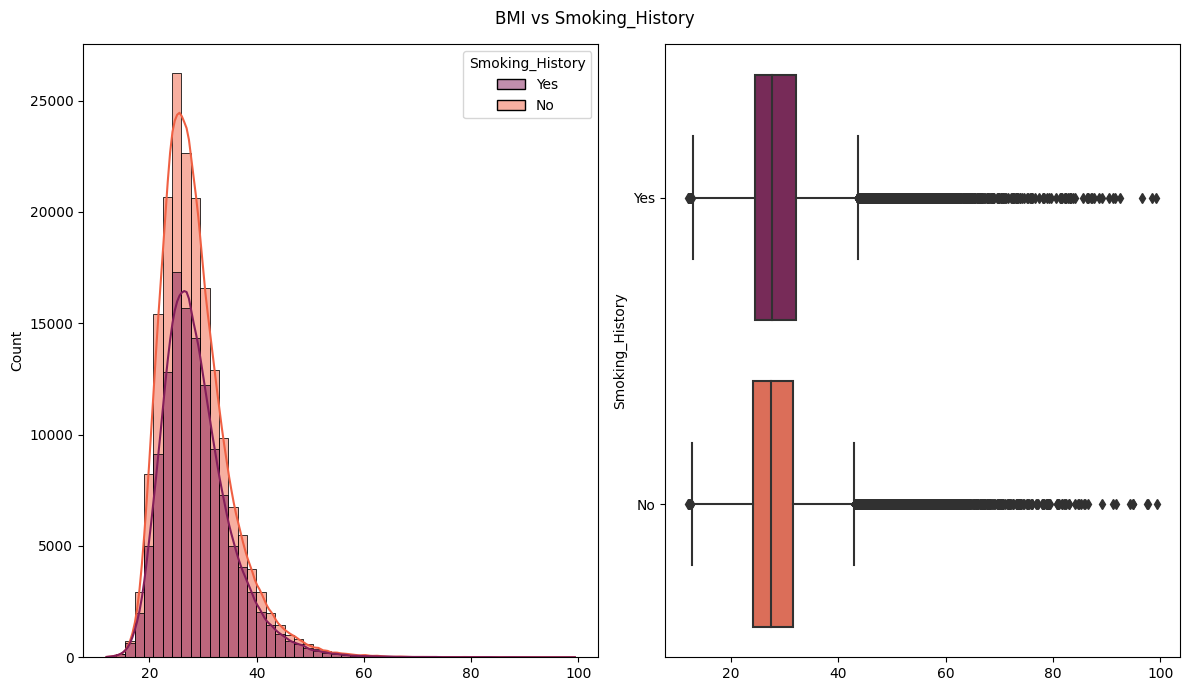

In [ ]:
#  Do Numeric vs Categorical analysis
for i in range(len(numeric_columns)):
  for j in range(len(categorical_columns)):
    num_col = numeric_columns[i]
    cat_col = categorical_columns[j]

    bivariate_numerical_categorical(data, num_col, cat_col)

<h2>Multivariate Analysis</h2>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

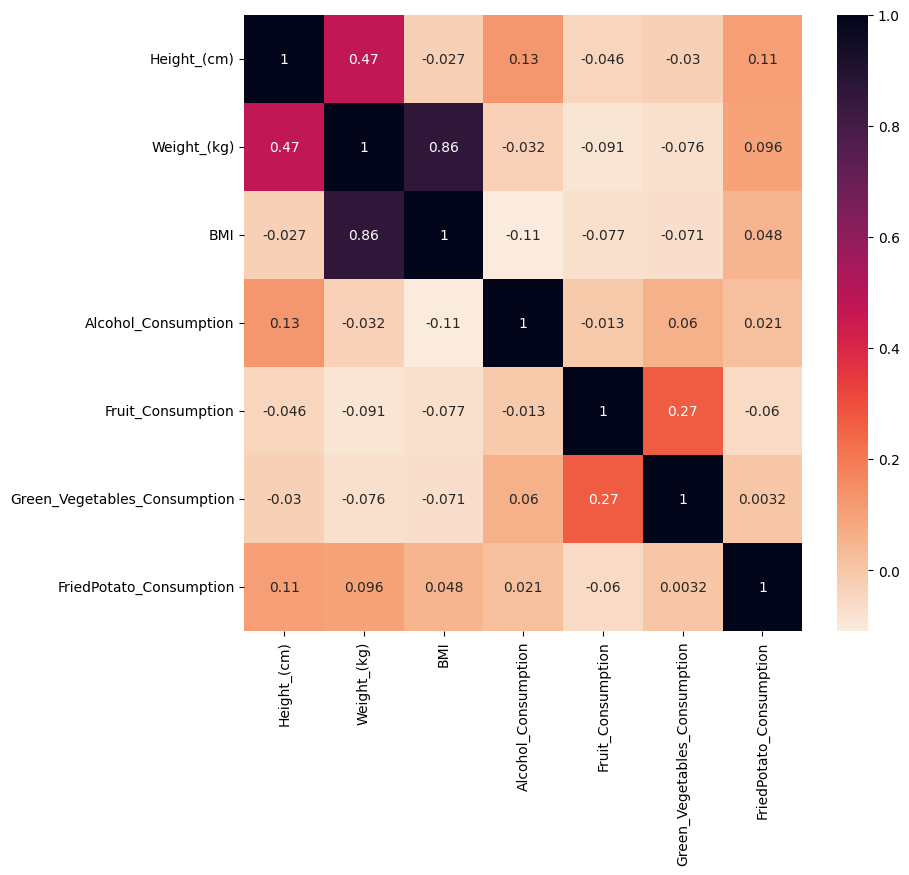

In [ ]:
# Correlation matrix
plt.figure(figsize=(9,8))
correlation = data[numerical].corr()
sns.heatmap(correlation,
            annot=True,
            cmap='rocket_r'
            )

<h2>Data Preparation</h2>

<h3>Preprocessing #1: Exercise column</h3>

Exercise column is overwhelmed with "Yes" value, the support is approximately 77.50%. This is very very high compared to other column.
<br>
**Exercise column should be removed**.

In [ ]:
# Remove Exercise from desired column
if ("Exercise" in categorical_columns):
  categorical_columns.remove("Exercise")
categorical_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Smoking_History']

<h3>Preprocessing #2: Diabetes column</h3>


In [ ]:
data["Diabetes"].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

It can be seen in *Diabetes* column that it has 4 unique values. Those are:
1. No
2. Yes
3. No, pre-diabetes or borderline diabetes
4. Yes, but female told only during pregnancy

We will change borderline diabetes to No, since pre-diabetes is still below the diabetes threshold.
<br>
**Change "No, pre-diabetes or borderline diabetes" to "No"**
<br><br>
We also want to do action on females who have diabetes but only during pregnancy. Based on scientific study, woman tend to lose ability to control sugar level in blood due to hormone levels change. Such study can be found here:
https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339. This particular data is actually a small portion from overall data. Hence, to prevent unwanted data being used in our study, it is better to **remove** them.
<br>


In [ ]:
# Preprocessing #1
data.loc[data["Diabetes"] == "No, pre-diabetes or borderline diabetes", "Diabetes"] = "No"
female_indexes = data[data["Diabetes"] == "Yes, but female told only during pregnancy"].index
data.drop(female_indexes, inplace=True)
data["Diabetes"].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['No', 'Yes'], dtype=object)

<h3>Feature Engineering: Binning on Numerical Columns</h3>

Several chosen columns are numerical, to do association rule predictive study with our dataset we must transform them into categorical. Thus, we will do binning on each numerical column.
<br><br>
Since every numeric columns other than BMI are not explained in the metadata, we should do the binning based on the data itself, meaning we will do quantile cuts. Cuts in general will be **Low, Medium, High, and Very High** for each numerical column.

In [ ]:
q_labels = ["Low", "Medium", "High", "Very High"]
numeric_as_categorical = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h4>Alcohol_Consumption</h4>

In [ ]:
# Binning of Alcohol_Consumption
target_col = "Alcohol_Consumption"
bin_col_name = "AlcoholConsumption"

# Override labels due to edge duplicate
alcohol_labels = ["Low", "Medium", "High"]

# Insert new column
data[bin_col_name] = pd.qcut(data[target_col], q=4, labels=alcohol_labels, duplicates='drop')

numeric_as_categorical.append(bin_col_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h4>FriedPotato_Consumption</h4>

In [ ]:
# Description of FriedPotato_Consumption
target_col = "FriedPotato_Consumption"
bin_col_name = "FriedPotatoConsumption"

pd.qcut(data[target_col], 4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0          (8.0, 128.0]
1            (2.0, 4.0]
2          (8.0, 128.0]
3            (4.0, 8.0]
4         (-0.001, 2.0]
              ...      
308848    (-0.001, 2.0]
308849    (-0.001, 2.0]
308850       (2.0, 4.0]
308852    (-0.001, 2.0]
308853    (-0.001, 2.0]
Name: FriedPotato_Consumption, Length: 306208, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 4.0] < (4.0, 8.0] < (8.0, 128.0]]

In [ ]:
# Binning of FriedPotato_Consumption

# Insert new column
data[bin_col_name] = pd.qcut(data[target_col], q=4, labels=q_labels, duplicates='drop')

numeric_as_categorical.append(bin_col_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h4>Green_Vegetables_Consumption</h4>

In [ ]:
# Binning of Green Vegetables Consumption
target_col = "Green_Vegetables_Consumption"
bin_col_name = "GreenVegetablesConsumption"

# Insert new column
data[bin_col_name] = pd.qcut(data[target_col], q=4, labels=q_labels, duplicates='drop')

numeric_as_categorical.append(bin_col_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h4>Fruit_Consumption</h4>

In [ ]:
# Description of Fruit_Consumption
target_col = "Fruit_Consumption"
bin_col_name = "FruitConsumption"

pd.qcut(data[target_col], 4, duplicates='drop')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0           (12.0, 30.0]
1           (12.0, 30.0]
2         (-0.001, 12.0]
3           (12.0, 30.0]
4         (-0.001, 12.0]
               ...      
308848      (12.0, 30.0]
308849      (12.0, 30.0]
308850      (12.0, 30.0]
308852      (12.0, 30.0]
308853    (-0.001, 12.0]
Name: Fruit_Consumption, Length: 306208, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 12.0] < (12.0, 30.0] < (30.0, 120.0]]

In [ ]:
# Binning of Fruit Consumption
# Override labels
fruit_labels = ["Low", "Medium", "High"]

# Insert new column
data[bin_col_name] = pd.qcut(data[target_col], q=3, labels=fruit_labels, duplicates='drop')

numeric_as_categorical.append(bin_col_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h4>BMI</h4>

Obesity level/category can be inferred from BMI.
<br>
Based on https://www.cdc.gov/obesity/basics/adult-defining.html, the categories can be broken down into:
1. If your BMI is less than 18.5, it falls within the underweight range.
2. If your BMI is 18.5 to <25, it falls within the healthy weight range.
3. If your BMI is 25.0 to <30, it falls within the overweight range.
4. If your BMI is 30.0 or higher, it falls within the obesity range.
<br>

Obesity is frequently subdivided into categories:

1. Class 1: BMI of 30 to < 35
2. Class 2: BMI of 35 to < 40
3. Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.
<br><br>

Hence, we will do binning into 6 categories with these condition:
1. BMI < 18.5 ➡ Underweight
2. 18.5 <= BMI < 25 ➡ HealthyWeight
3. 25.0 <= BMI < 30 ➡ OverWeight
4. 30.0 <= BMI < 35.0 ➡ Obesity1
5. 35.0 <= BMI < 40.0 ➡ Obesity2
6. BMI >= 40.0 ➡ Obesity3

In [ ]:
# Binning of BMI
target_col = "BMI"
bin_col_name = "ObesityLevel"

cuts = [0, 18.5, 25, 30, 35, 40, 100]
bin_labels = ["Underweight", "HealthyWeight", "OverWeight", "Obesity1", "Obesity2", "Obesity3"]

# Insert new column
data[bin_col_name] = pd.cut(data[target_col], bins=cuts, labels=bin_labels)

numeric_as_categorical.append(bin_col_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Dropping old numeric columns
for col in numeric_columns:
  data.drop(col, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Head of to check after binning
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg) Smoking_History AlcoholConsumption  \
0        150.0        32.66             Yes                Low   
1        165.0        77.11              No                Low   
2        163.0        88.45              No             Medium   
3        180.0        93.44              No                Low   
4        191.0        88.45             Yes                Low   

  FriedPotatoConsumption GreenVegetablesConsumption FruitConsumption  \
0              Very High                       High           Medium   
1                 Medium                        Low           Medium   
2              Very High                        Low              Low   
3                   High                  Very High           Medium   
4                    Low                        Low              Low   

    ObesityLevel  
0    Underweight  
1     OverWeight  
2       Obesity1  
3     OverWeight  
4  HealthyWeight

<h3>Preprocessing #3: One-Hot Encoding</h3>

In [ ]:
# Apply One Hot Encoding
selected_columns = categorical_columns + numeric_as_categorical
selected_data = data[selected_columns]
ohe_encoder = OneHotEncoder(sparse=False)

encoded_data = ohe_encoder.fit_transform(selected_data)
feature_names = ohe_encoder.get_feature_names_out(selected_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create dataframe from Onehot encoding result
encoded = pd.DataFrame(encoded_data)

# Put back index
encoded.index = selected_data.index

# Ensure column in string
encoded.columns = feature_names

# Show head of encoded data
encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Heart_Disease_No  Heart_Disease_Yes  Skin_Cancer_No  Skin_Cancer_Yes  \
0               1.0                0.0             1.0              0.0   
1               0.0                1.0             1.0              0.0   
2               1.0                0.0             1.0              0.0   
3               0.0                1.0             1.0              0.0   
4               1.0                0.0             1.0              0.0   

   Other_Cancer_No  Other_Cancer_Yes  Depression_No  Depression_Yes  \
0              1.0               0.0            1.0             0.0   
1              1.0               0.0            1.0             0.0   
2              1.0               0.0            1.0             0.0   
3              1.0               0.0            1.0             0.0   
4              1.0               0.0            1.0             0.0   

   Diabetes_No  Diabetes_Yes  ...  GreenVegetablesConsumption_Very High  \
0          1.0           0.0  ...                                   0.0   
1          0.0           1.0  ...                                   0.0   
2          0.0           1.0  ...                                   0.0   
3          0.0           1.0  ...                                   1.0   
4          1.0           0.0  ...                                   0.0   

   FruitConsumption_High  FruitConsumption_Low  FruitConsumption_Medium  \
0                    0.0                   0.0                      1.0   
1                    0.0                   0.0                      1.0   
2                    0.0                   1.0                      0.0   
3                    0.0                   0.0                      1.0   
4                    0.0                   1.0                      0.0   

   ObesityLevel_HealthyWeight  ObesityLevel_Obesity1  ObesityLevel_Obesity2  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                         0.0                    1.0                    0.0   
3                         0.0                    0.0                    0.0   
4                         1.0                    0.0                    0.0   

   ObesityLevel_Obesity3  ObesityLevel_OverWeight  ObesityLevel_Underweight  
0                    0.0                      0.0                       1.0  
1                    0.0                      1.0                       0.0  
2                    0.0                      0.0                       0.0  
3                    0.0                      1.0                       0.0  
4                    0.0                      0.0                       0.0  

[5 rows x 34 columns]

In market basket analysis, normally the input data is a transactional data. For each row or record means 1 transaction, the row contains items that are bought/chosen for that particular purchase. To fit such condition, we should remove binary columns we encoded previously as they are redundant. For example:
<br>
**Diabetes_Yes** & **Diabetes_No** are opposite of each other.<br>
When **Diabetes_Yes** has value 1.0, **Diabetes_No** should has 0.0 and vice versa.<br><br>
We need to remove one of them and in this case I will remove any binary columns ending with **"_No"**. So I will leave **Diabetes_Yes** and other **"_Yes"** columns in the data.


In [ ]:
feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Heart_Disease_No', 'Heart_Disease_Yes', 'Skin_Cancer_No',
       'Skin_Cancer_Yes', 'Other_Cancer_No', 'Other_Cancer_Yes',
       'Depression_No', 'Depression_Yes', 'Diabetes_No', 'Diabetes_Yes',
       'Arthritis_No', 'Arthritis_Yes', 'Smoking_History_No',
       'Smoking_History_Yes', 'AlcoholConsumption_High',
       'AlcoholConsumption_Low', 'AlcoholConsumption_Medium',
       'FriedPotatoConsumption_High', 'FriedPotatoConsumption_Low',
       'FriedPotatoConsumption_Medium',
       'FriedPotatoConsumption_Very High',
       'GreenVegetablesConsumption_High',
       'GreenVegetablesConsumption_Low',
       'GreenVegetablesConsumption_Medium',
       'GreenVegetablesConsumption_Very High', 'FruitConsumption_High',
       'FruitConsumption_Low', 'FruitConsumption_Medium',
       'ObesityLevel_HealthyWeight', 'ObesityLevel_Obesity1',
       'ObesityLevel_Obesity2', 'ObesityLevel_Obesity3',
       'ObesityLevel_OverWeight', 'ObesityLevel_Underweight'],
      dtype=object)

In [ ]:
# Remove redundant cols with col name ending with _No
redundant_cols = []
usable_cols = []
for col in feature_names:
  if col[len(col)-3:] == "_No":
    redundant_cols.append(col)
  else:
    usable_cols.append(col)

print("Redundant: ", redundant_cols)
print("Usable: ", usable_cols)

Redundant:  ['Heart_Disease_No', 'Skin_Cancer_No', 'Other_Cancer_No', 'Depression_No', 'Diabetes_No', 'Arthritis_No', 'Smoking_History_No']
Usable:  ['Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes', 'Arthritis_Yes', 'Smoking_History_Yes', 'AlcoholConsumption_High', 'AlcoholConsumption_Low', 'AlcoholConsumption_Medium', 'FriedPotatoConsumption_High', 'FriedPotatoConsumption_Low', 'FriedPotatoConsumption_Medium', 'FriedPotatoConsumption_Very High', 'GreenVegetablesConsumption_High', 'GreenVegetablesConsumption_Low', 'GreenVegetablesConsumption_Medium', 'GreenVegetablesConsumption_Very High', 'FruitConsumption_High', 'FruitConsumption_Low', 'FruitConsumption_Medium', 'ObesityLevel_HealthyWeight', 'ObesityLevel_Obesity1', 'ObesityLevel_Obesity2', 'ObesityLevel_Obesity3', 'ObesityLevel_OverWeight', 'ObesityLevel_Underweight']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop redundant data
transaction_data = encoded.drop(redundant_cols, axis=1)
transaction_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Heart_Disease_Yes  Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  \
0                0.0              0.0               0.0             0.0   
1                1.0              0.0               0.0             0.0   
2                0.0              0.0               0.0             0.0   
3                1.0              0.0               0.0             0.0   
4                0.0              0.0               0.0             0.0   

   Diabetes_Yes  Arthritis_Yes  Smoking_History_Yes  AlcoholConsumption_High  \
0           0.0            1.0                  1.0                      0.0   
1           1.0            0.0                  0.0                      0.0   
2           1.0            0.0                  0.0                      0.0   
3           1.0            0.0                  0.0                      0.0   
4           0.0            0.0                  1.0                      0.0   

   AlcoholConsumption_Low  AlcoholConsumption_Medium  ...  \
0                     1.0                        0.0  ...   
1                     1.0                        0.0  ...   
2                     0.0                        1.0  ...   
3                     1.0                        0.0  ...   
4                     1.0                        0.0  ...   

   GreenVegetablesConsumption_Very High  FruitConsumption_High  \
0                                   0.0                    0.0   
1                                   0.0                    0.0   
2                                   0.0                    0.0   
3                                   1.0                    0.0   
4                                   0.0                    0.0   

   FruitConsumption_Low  FruitConsumption_Medium  ObesityLevel_HealthyWeight  \
0                   0.0                      1.0                         0.0   
1                   0.0                      1.0                         0.0   
2                   1.0                      0.0                         0.0   
3                   0.0                      1.0                         0.0   
4                   1.0                      0.0                         1.0   

   ObesityLevel_Obesity1  ObesityLevel_Obesity2  ObesityLevel_Obesity3  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    1.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   ObesityLevel_OverWeight  ObesityLevel_Underweight  
0                      0.0                       1.0  
1                      1.0                       0.0  
2                      0.0                       0.0  
3                      1.0                       0.0  
4                      0.0                       0.0  

[5 rows x 27 columns]

<h2>Predictive Study</h2>

**Predictive study**: Connection between health conditions using Association rule.

In this study, we will use **Apriori algorithm** to generates the rules.

In [ ]:
# Apply Apriori Algorithm
frequent_items = apriori(transaction_data, min_support=0.08, use_colnames=True, verbose=True)
frequent_items.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 36 combinations | Sampling itemset size 4


support             itemsets
0  0.081236  (Heart_Disease_Yes)
1  0.097431    (Skin_Cancer_Yes)
2  0.097022   (Other_Cancer_Yes)
3  0.199632     (Depression_Yes)
4  0.131189       (Diabetes_Yes)

In [ ]:
# Association rule
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generated rules
sorted_rules = rules.sort_values(by=["confidence", "lift"], ascending=[False, False])
sorted_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
2                                      (Diabetes_Yes)   
18        (Arthritis_Yes, FriedPotatoConsumption_Low)   
8                    (GreenVegetablesConsumption_Low)   
22  (FruitConsumption_Low, GreenVegetablesConsumpt...   
3                                     (Arthritis_Yes)   
5                        (FriedPotatoConsumption_Low)   
19           (Arthritis_Yes, FruitConsumption_Medium)   
17               (Arthritis_Yes, Smoking_History_Yes)   
21  (FruitConsumption_Medium, FriedPotatoConsumpti...   
1                                    (Depression_Yes)   
14                            (ObesityLevel_Obesity1)   
12                             (FruitConsumption_Low)   
11                            (FruitConsumption_High)   
20        (FruitConsumption_Low, Smoking_History_Yes)   
9                 (GreenVegetablesConsumption_Medium)   
13                          (FruitConsumption_Medium)   
6                     (FriedPotatoConsumption_Medium)   
10             (GreenVegetablesConsumption_Very High)   
4                               (Smoking_History_Yes)   
15                          (ObesityLevel_OverWeight)   
16                   (GreenVegetablesConsumption_Low)   
23  (AlcoholConsumption_Low, GreenVegetablesConsum...   
0                                    (Depression_Yes)   
7                  (FriedPotatoConsumption_Very High)   

                 consequents  antecedent support  consequent support  \
2   (AlcoholConsumption_Low)            0.131189            0.534663   
18  (AlcoholConsumption_Low)            0.132897            0.534663   
8   (AlcoholConsumption_Low)            0.276815            0.534663   
22  (AlcoholConsumption_Low)            0.140081            0.534663   
3   (AlcoholConsumption_Low)            0.327741            0.534663   
5   (AlcoholConsumption_Low)            0.356771            0.534663   
19  (AlcoholConsumption_Low)            0.140346            0.534663   
17  (AlcoholConsumption_Low)            0.161322            0.534663   
21  (AlcoholConsumption_Low)            0.151377            0.534663   
1   (AlcoholConsumption_Low)            0.199632            0.534663   
14  (AlcoholConsumption_Low)            0.197438            0.534663   
12  (AlcoholConsumption_Low)            0.340791            0.534663   
11  (AlcoholConsumption_Low)            0.230232            0.534663   
20  (AlcoholConsumption_Low)            0.159646            0.534663   
9   (AlcoholConsumption_Low)            0.319779            0.534663   
13  (AlcoholConsumption_Low)            0.428976            0.534663   
6   (AlcoholConsumption_Low)            0.269206            0.534663   
10  (AlcoholConsumption_Low)            0.234037            0.534663   
4   (AlcoholConsumption_Low)            0.405812            0.534663   
15  (AlcoholConsumption_Low)            0.355559            0.534663   
16    (FruitConsumption_Low)            0.276815            0.340791   
23    (FruitConsumption_Low)            0.171498            0.340791   
0      (Smoking_History_Yes)            0.199632            0.405812   
7   (AlcoholConsumption_Low)            0.201180            0.534663   

     support  confidence      lift  leverage  conviction  zhangs_metric  
2   0.094873    0.723183  1.352597  0.024732    1.681031       0.300044  
18  0.083600    0.629061  1.176556  0.012545    1.254484       0.173061  
8   0.171498    0.619539  1.158748  0.023495    1.223089       0.189439  
22  0.086471    0.617289  1.154539  0.011574    1.215898       0.155659  
3   0.195272    0.595813  1.114372  0.020041    1.151292       0.152669  
5   0.208646    0.584818  1.093807  0.017894    1.120802       0.133330  
19  0.081503    0.580733  1.086167  0.006466    1.109883       0.092283  
17  0.092352    0.572473  1.070717  0.006100    1.088438       0.078751  
21  0.086605    0.572110  1.070038  0.005669    1.087515       0.077130  
1   0.113377    0.567930  1.062221  0.006641    1.076995       0.073187  
1

Many rules have been generated, but analyzing disease combined with lifestyle did not give enough enlightening result.
<hr/>
We may come with a second test, with the data being only disesase data:

1. Heart_Disease
2. Skin_Cancer
3. Other_Cancer
4. Depression
5. Diabetes
6. Arthritis

<h3>Market Basket Analysis on Disease</h3>

In [ ]:
# Disease columns
disease = [
    "Heart_Disease",
    "Skin_Cancer",
    "Other_Cancer",
    "Depression",
    "Diabetes",
    "Arthritis"
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Feature engineering: One-Hot Encoding
selected_columns = disease
selected_data_2 = data[selected_columns]
ohe_encoder_2 = OneHotEncoder(sparse=False)

encoded_data_2 = ohe_encoder_2.fit_transform(selected_data_2)
feature_names_2 = ohe_encoder_2.get_feature_names_out(selected_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create dataframe from Onehot encoding result
encoded_2 = pd.DataFrame(encoded_data_2)

# Put back index
encoded_2.index = selected_data_2.index

# Ensure column in string
encoded_2.columns = feature_names_2

# Show head of encoded data
encoded_2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Heart_Disease_No  Heart_Disease_Yes  Skin_Cancer_No  Skin_Cancer_Yes  \
0               1.0                0.0             1.0              0.0   
1               0.0                1.0             1.0              0.0   
2               1.0                0.0             1.0              0.0   
3               0.0                1.0             1.0              0.0   
4               1.0                0.0             1.0              0.0   

   Other_Cancer_No  Other_Cancer_Yes  Depression_No  Depression_Yes  \
0              1.0               0.0            1.0             0.0   
1              1.0               0.0            1.0             0.0   
2              1.0               0.0            1.0             0.0   
3              1.0               0.0            1.0             0.0   
4              1.0               0.0            1.0             0.0   

   Diabetes_No  Diabetes_Yes  Arthritis_No  Arthritis_Yes  
0          1.0           0.0           0.0            1.0  
1          0.0           1.0           1.0            0.0  
2          0.0           1.0           1.0            0.0  
3          0.0           1.0           1.0            0.0  
4          1.0           0.0           1.0            0.0

In [ ]:
# Remove redundant cols with col name ending with _No
redundant_cols_2 = []
usable_cols_2 = []
for col in feature_names_2:
  if col[len(col)-3:] == "_No":
    redundant_cols_2.append(col)
  else:
    usable_cols_2.append(col)

print("Redundant: ", redundant_cols_2)
print("Usable: ", usable_cols_2)

# Drop redundant data
transaction_data_2 = encoded_2.drop(redundant_cols_2, axis=1)
transaction_data_2.head()

Redundant:  ['Heart_Disease_No', 'Skin_Cancer_No', 'Other_Cancer_No', 'Depression_No', 'Diabetes_No', 'Arthritis_No']
Usable:  ['Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_Yes', 'Arthritis_Yes']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Heart_Disease_Yes  Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  \
0                0.0              0.0               0.0             0.0   
1                1.0              0.0               0.0             0.0   
2                0.0              0.0               0.0             0.0   
3                1.0              0.0               0.0             0.0   
4                0.0              0.0               0.0             0.0   

   Diabetes_Yes  Arthritis_Yes  
0           0.0            1.0  
1           1.0            0.0  
2           1.0            0.0  
3           1.0            0.0  
4           0.0            0.0

In [ ]:
# Apply Apriori Algorithm
frequent_items_2 = apriori(transaction_data_2, min_support=0.08, use_colnames=True, verbose=True)
frequent_items_2.head()

Processing 30 combinations | Sampling itemset size 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support             itemsets
0  0.081236  (Heart_Disease_Yes)
1  0.097431    (Skin_Cancer_Yes)
2  0.097022   (Other_Cancer_Yes)
3  0.199632     (Depression_Yes)
4  0.131189       (Diabetes_Yes)

In [ ]:
# Association rule
rules_2 = association_rules(frequent_items_2, metric='lift', min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generated rules
sorted_rules_2 = rules_2.sort_values(by=["confidence", "lift"], ascending=[False, False])
sorted_rules_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents       consequents  antecedent support  consequent support  \
1  (Depression_Yes)   (Arthritis_Yes)            0.199632            0.327741   
0   (Arthritis_Yes)  (Depression_Yes)            0.327741            0.199632   

    support  confidence      lift  leverage  conviction  zhangs_metric  
1  0.088257    0.442098  1.348923  0.022829    1.204976       0.323186  
0  0.088257    0.269289  1.348923  0.022829    1.095327       0.384775

From the rule generated above, we can say that:


*   Depression may lead to Arthritis (with **0.442 confidence** and **1.349 lift**)

